In [1]:
#A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could
#predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn
#customers' decisions in the opposite direction

#Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. 
#There are nearly 18 features.
#We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.



#Un gerente en el banco está preocupado porque cada vez más clientes están abandonando sus servicios de tarjetas de crédito. Apreciarían mucho
#si alguien pudiera predecirles quiénes van a cancelar el servicio, para que puedan acercarse proactivamente al cliente y brindarles mejores servicios, logrando cambiar la decisión de los clientes en sentido contrario.

#Ahora, este conjunto de datos consiste en 10,000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito,
#categoría de tarjeta de crédito, etc. Hay casi 18 características en total.

#Solo tenemos un 16.07% de clientes que han cancelado el servicio, por lo que es un poco difícil entrenar nuestro modelo para predecir clientes
#que cancelarán el servicio.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

filename='/kaggle/input/credit-card-customers/BankChurners.csv'
df=pd.read_csv(filename)
df.head(100)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
..        ...                ...           ...    ...              ...   
95  719712633  Existing Customer            64      M                1   
96  772629333  Existing Customer            45      M                3   
97  720336708  Existing Customer            53      M                3   
98  802013583  Existing Customer            56      M                3   
99  711887583  Attrited Customer            47      M                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
..             ...            ...             ...           ...   
95        Graduate        Married  Less than $40K          Blue   
96        Graduate        Married     $40K - $60K          Blue   
97       Doctorate        Married     $40K - $60K          Blue   
98         College        Married         $120K +          Blue   
99         Unknown        Married    $80K - $120K          Blue   

    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               39  ...       12691.0                  777          11914.0   
1               44  ...        8256.0                  864           7392.0   
2               36  ...        3418.0                    0           3418.0   
3               34  ...        3313.0                 2517            796.0   
4               21  ...        4716.0                    0           4716.0   
..             ...  ...           ...                  ...              ...   
95              52  ...        1709.0                  895            814.0   
96              35  ...        3454.0                 1200           2254.0   
97              35  ...        3789.0                 1706           2083.0   
98              50  ...        9689.0                 2250           7439.0   
99              37  ...        5449.0                 1628           3821.0   

    Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  1.335             1144              42   
1                  1.541             1291              33   
2                  2.594             1887              20   
3                  1.405             1171              20   
4                  2.175              816              28   
..                   ...              ...             ...   
95                 1.656             1673              32   
96                 0.597             1313              30   
97                 1.047             1609              42   
98                 0.576             1158              19   
99                 0.696              836              18   

    Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                 1.625                  0.061   
1                 3.714                  0.105   
2                 2.333                  0.000   
3                 2.333                  0.760   
4                 2.500                  0.000   
..                  ...                    ...   
95                0.882                  0.524   
96                0.304                  0.347   
97                0.680                  0.450   
98                0.727                  0.232   
99                0.385                  0.299   

    Naive_Bayes_Classifier_

In [2]:
#DATA EXPLORATION

#We can see that the last two columns provided are related to a previously conducted training, we can delete them.
#Podemos ver que las últimas dos columnas proporcionadas tienen que ver con un entrenamiento previamante realizado, podemos eliminarlas

del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.head(100)


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
..        ...                ...           ...    ...              ...   
95  719712633  Existing Customer            64      M                1   
96  772629333  Existing Customer            45      M                3   
97  720336708  Existing Customer            53      M                3   
98  802013583  Existing Customer            56      M                3   
99  711887583  Attrited Customer            47      M                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
..             ...            ...             ...           ...   
95        Graduate        Married  Less than $40K          Blue   
96        Graduate        Married     $40K - $60K          Blue   
97       Doctorate        Married     $40K - $60K          Blue   
98         College        Married         $120K +          Blue   
99         Unknown        Married    $80K - $120K          Blue   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0               39  ...                       1                      3   
1               44  ...                       1                      2   
2               36  ...                       1                      0   
3               34  ...                       4                      1   
4               21  ...                       1                      0   
..             ...  ...                     ...                    ...   
95              52  ...                       4                      3   
96              35  ...                       4                      2   
97              35  ...                       3                      2   
98              50  ...                       2                      0   
99              37  ...                       3                      3   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0        12691.0                  777          11914.0                 1.335   
1         8256.0                  864           7392.0                 1.541   
2         3418.0                    0           3418.0                 2.594   
3         3313.0                 2517            796.0                 1.405   
4         4716.0                    0           4716.0                 2.175   
..           ...                  ...              ...                   ...   
95        1709.0                  895            814.0                 1.656   
96        3454.0                 1200           2254.0                 0.597   
97        3789.0                 1706           2083.0                 1.047   
98        9689.0                 2250           7439.0                 0.576   
99        5449.0                 1628           3821.0                 0.696   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              1144              42                1.625   
1              1291              33                3.714   
2              1887              20                2.333   
3              1171              20                2.333   
4               816              28                2.500   
..              ...             ...                  ...   
95             1673              32     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
########FEATURES DESCRIPTION


#CLIENTNUM
#Client number. Unique identifier for the customer holding the account

#ATTRITION_FLAG
#Internal event (customer activity) variable - if the account is closed then 1 else 0

#CUSTOMER_AGE
#Demographic variable - Customer's Age in Years

#GENDER
#Demographic variable - M=Male, F=Female

#DEPENDENT_COUT
#Demographic variable - Number of dependents

#EDUCATION_LEVEL
#Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

#MARITAL_STATUS
#Demographic variable - Married, Single, Divorced, Unknown

#INCOME_CATEGORY
#Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

#CARD CATEGORY
#Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

#MONTHS_ON_BOOK
#Period of relationship with bank

#TOTAL_RELATIONSHIP_COUNT
#Total no. of products held by the customer

#MONTHS_INACTIVE_12_MON
#No. of months inactive in the last 12 months

#CONTACTS_COUNT_12_MON
#No. of Contacts in the last 12 months

#CREDIT_LIMIT
#Credit Limit on the Credit Card

#TOTAL_REVOLVING_BALANCE
#Total Revolving Balance on the Credit Card

#AV_OPEN_TO_BUY
#Open to Buy Credit Line (Average of last 12 months)

#Total_Amt_Chng_Q4_Q1
#Change in Transaction Amount (Q4 over Q1)

#Total_Trans_Amt
#Total Transaction Amount (Last 12 months)

#Total_Ct_Chng_Q4_Q1
#Change in Transaction Count (Q4 over Q1)

#Avg_Utilization_Ratio
#Average Card Utilization Ratio

#############################

#DESCRIPCIÓN DE LAS CARACTERÍSTICAS

#CLIENTNUM
#Número de cliente. Identificador único para el cliente que posee la cuenta.

#ATTRITION_FLAG
#Variable de evento interno (actividad del cliente) - si la cuenta está cerrada entonces 1, de lo contrario 0.

#CUSTOMER_AGE
#Variable demográfica - Edad del cliente en años.

#GENDER
#Variable demográfica - Género del cliente. M=Masculino, F=Femenino.

#DEPENDENT_COUT
#Variable demográfica - Número de dependientes.

#EDUCATION_LEVEL
#Variable demográfica - Nivel educativo del titular de la cuenta (por ejemplo: secundaria, graduado universitario, etc.).

#MARITAL_STATUS
#Variable demográfica - Estado civil. Casado, Soltero, Divorciado, Desconocido.

#INCOME_CATEGORY
#Variable demográfica - Categoría de ingresos anuales del titular de la cuenta (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Desconocido).

#CARD CATEGORY
#Variable de producto - Tipo de tarjeta (Azul, Plata, Oro, Platino).

#MONTHS_ON_BOOK
#Período de relación con el banco.

#TOTAL_RELATIONSHIP_COUNT
#Total de productos adquiridos por el cliente.

#MONTHS_INACTIVE_12_MON
#Número de meses inactivos en los últimos 12 meses.

#CONTACTS_COUNT_12_MON
#Número de contactos en los últimos 12 meses.

#CREDIT_LIMIT
#Límite de crédito en la tarjeta de crédito.

#TOTAL_REVOLVING_BALANCE
#Saldo total revolvente de la tarjeta de crédito.

#AV_OPEN_TO_BUY
#Línea de crédito disponible para comprar (promedio de los últimos 12 meses).

#Total_Amt_Chng_Q4_Q1
#Cambio en el monto de transacción (Q4 sobre Q1).

#Total_Trans_Amt
#Monto total de transacciones (últimos 12 meses).

#Total_Ct_Chng_Q4_Q1
#Cambio en el número de transacciones (Q4 sobre Q1).

#Avg_Utilization_Ratio
#Ratio de utilización promedio de la tarjeta.



In [5]:
#Our target variable is #ATTRITION_FLAG, which indicates whether the customer stays with the institution or has churned.
#Nuestra variable objetivo es #ATTRITION_FLAG que nos indica si el cliente permanece en la institución o se fugó.
#Verifying that the output variable only has two categories.
#Checamos que la salida y solamente tenga dos categorías
df['Attrition_Flag'].unique()


array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [6]:
df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
df.head(100)

CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383               0            45      M                3   
1   818770008               0            49      F                5   
2   713982108               0            51      M                3   
3   769911858               0            40      F                4   
4   709106358               0            40      M                3   
..        ...             ...           ...    ...              ...   
95  719712633               0            64      M                1   
96  772629333               0            45      M                3   
97  720336708               0            53      M                3   
98  802013583               0            56      M                3   
99  711887583               1            47      M                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
..             ...            ...             ...           ...   
95        Graduate        Married  Less than $40K          Blue   
96        Graduate        Married     $40K - $60K          Blue   
97       Doctorate        Married     $40K - $60K          Blue   
98         College        Married         $120K +          Blue   
99         Unknown        Married    $80K - $120K          Blue   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0               39  ...                       1                      3   
1               44  ...                       1                      2   
2               36  ...                       1                      0   
3               34  ...                       4                      1   
4               21  ...                       1                      0   
..             ...  ...                     ...                    ...   
95              52  ...                       4                      3   
96              35  ...                       4                      2   
97              35  ...                       3                      2   
98              50  ...                       2                      0   
99              37  ...                       3                      3   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0        12691.0                  777          11914.0                 1.335   
1         8256.0                  864           7392.0                 1.541   
2         3418.0                    0           3418.0                 2.594   
3         3313.0                 2517            796.0                 1.405   
4         4716.0                    0           4716.0                 2.175   
..           ...                  ...              ...                   ...   
95        1709.0                  895            814.0                 1.656   
96        3454.0                 1200           2254.0                 0.597   
97        3789.0                 1706           2083.0                 1.047   
98        9689.0                 2250           7439.0                 0.576   
99        5449.0                 1628           3821.0                 0.696   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              1144              42                1.625   
1              1291              33                3.714   
2              1887              20                2.333   
3              1171              20                2.333   
4               816              28                2.500   
..              ...             ...                  ...   
95             1673              32                0.882   
96             1

In [7]:
#DF_Rows=10127
#Before removing unnecessary columns for the model, we must check that all customer IDs are unique to avoid having duplicate information.
#Antes de eliminar las columnas innecesarias para el modelo, debemos checar que todos los ID de los clientes sean únicos para evitar tener
#información duplicada
df.nunique().sort_values(ascending=False) #This method calculates the number of unique values for each column in the DataFrame.


CLIENTNUM                   10127
Avg_Open_To_Buy              6813
Credit_Limit                 6205
Total_Trans_Amt              5033
Total_Revolving_Bal          1974
Total_Amt_Chng_Q4_Q1         1158
Avg_Utilization_Ratio         964
Total_Ct_Chng_Q4_Q1           830
Total_Trans_Ct                126
Customer_Age                   45
Months_on_book                 44
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Education_Level                 7
Income_Category                 6
Dependent_count                 6
Total_Relationship_Count        6
Card_Category                   4
Marital_Status                  4
Attrition_Flag                  2
Gender                          2
dtype: int64

In [8]:
#The gender feature has only two values, so we can make it numeric.
#La característica de genero solo tiene dos valores por lo que podemos hacerla númerica
df['Gender']=df['Gender'].replace({'F':0,'M':1})
df.head()


CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               0            45       1                3   
1  818770008               0            49       0                5   
2  713982108               0            51       1                3   
3  769911858               0            40       0                4   
4  709106358               0            40       1                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [10]:
#As we can see, CLIENTNUM doesn't have duplicate values. We can check some of the unique values in the columns to become
#more familiar with the concepts.

#Como podemos ver CLIENTNUM no tiene valores duplicados, podemos verificar algunos de los valores únicos de las columnas para estar
#mas familiarizados con los conceptos

selected_features = ['Education_Level', 'Marital_Status','Income_Category','Card_Category']

for column in selected_features:
    unique_values = df[column].unique()
    print(f"Unique values in the colum '{column}': {unique_values}")

Unique values in the colum 'Education_Level': ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in the colum 'Marital_Status': ['Married' 'Single' 'Unknown' 'Divorced']
Unique values in the colum 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Unique values in the colum 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']


In [11]:
#We should know how many 'Unknown' values we have.
#Debemos saber cuantos valores unknown tenemos
unknown_count = df['Education_Level'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Education_level column: {unknown_count}")
unknown_count = df['Marital_Status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Marital_Status column: {unknown_count}")
unknown_count = df['Income_Category'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Income_Category column: {unknown_count}")

Number of 'Unknown' values in Education_level column: 1519
Number of 'Unknown' values in Marital_Status column: 749
Number of 'Unknown' values in Income_Category column: 1112


In [12]:
#We will handle the 'Unknown' values when applying one-hot encoding.
#Manejaremos los valores Unknown a la hora de aplicar one-hot-coding
#Checking for any null values in our dataset.
#Checar si hay valores nulos en nuestro dataset
df.isnull().sum()


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
#This feature is not necessary; it has been inspected to ensure there is no duplicated information. Therefore, we can remove it.
#Esta característica no es necesaria, ya se inspeccionó que no hubiera información duplicada. Por lo tanto la podemos eliminar.
del df['CLIENTNUM']
df.head(100)


Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0                0            45       1                3     High School   
1                0            49       0                5        Graduate   
2                0            51       1                3        Graduate   
3                0            40       0                4     High School   
4                0            40       1                3      Uneducated   
..             ...           ...     ...              ...             ...   
95               0            64       1                1        Graduate   
96               0            45       1                3        Graduate   
97               0            53       1                3       Doctorate   
98               0            56       1                3         College   
99               1            47       1                2         Unknown   

   Marital_Status Income_Category Card_Category  Months_on_book  \
0         Married     $60K - $80K          Blue              39   
1          Single  Less than $40K          Blue              44   
2         Married    $80K - $120K          Blue              36   
3         Unknown  Less than $40K          Blue              34   
4         Married     $60K - $80K          Blue              21   
..            ...             ...           ...             ...   
95        Married  Less than $40K          Blue              52   
96        Married     $40K - $60K          Blue              35   
97        Married     $40K - $60K          Blue              35   
98        Married         $120K +          Blue              50   
99        Married    $80K - $120K          Blue              37   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                          5                       1                      3   
1                          6                       1                      2   
2                          4                       1                      0   
3                          3                       4                      1   
4                          5                       1                      0   
..                       ...                     ...                    ...   
95                         6                       4                      3   
96                         5                       4                      2   
97                         5                       3                      2   
98                         3                       2                      0   
99                         2                       3                      3   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0        12691.0                  777          11914.0                 1.335   
1         8256.0                  864           7392.0                 1.541   
2         3418.0                    0           3418.0                 2.594   
3         3313.0                 2517            796.0                 1.405   
4         4716.0                    0           4716.0                 2.175   
..           ...                  ...              ...                   ...   
95        1709.0                  895            814.0                 1.656   
96        3454.0                 1200           2254.0                 0.597   
97        3789.0                 1706           2083.0                 1.047   
98        9689.0                 2250           7439.0                 0.576   
99        5449.0                 1628           3821.0                 0.696   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              1144              42                1.625   
1              1291              33                3.714   
2              1887              20                2.333   
3              1171              20                2.333   
4               816              28                2.500   
..  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

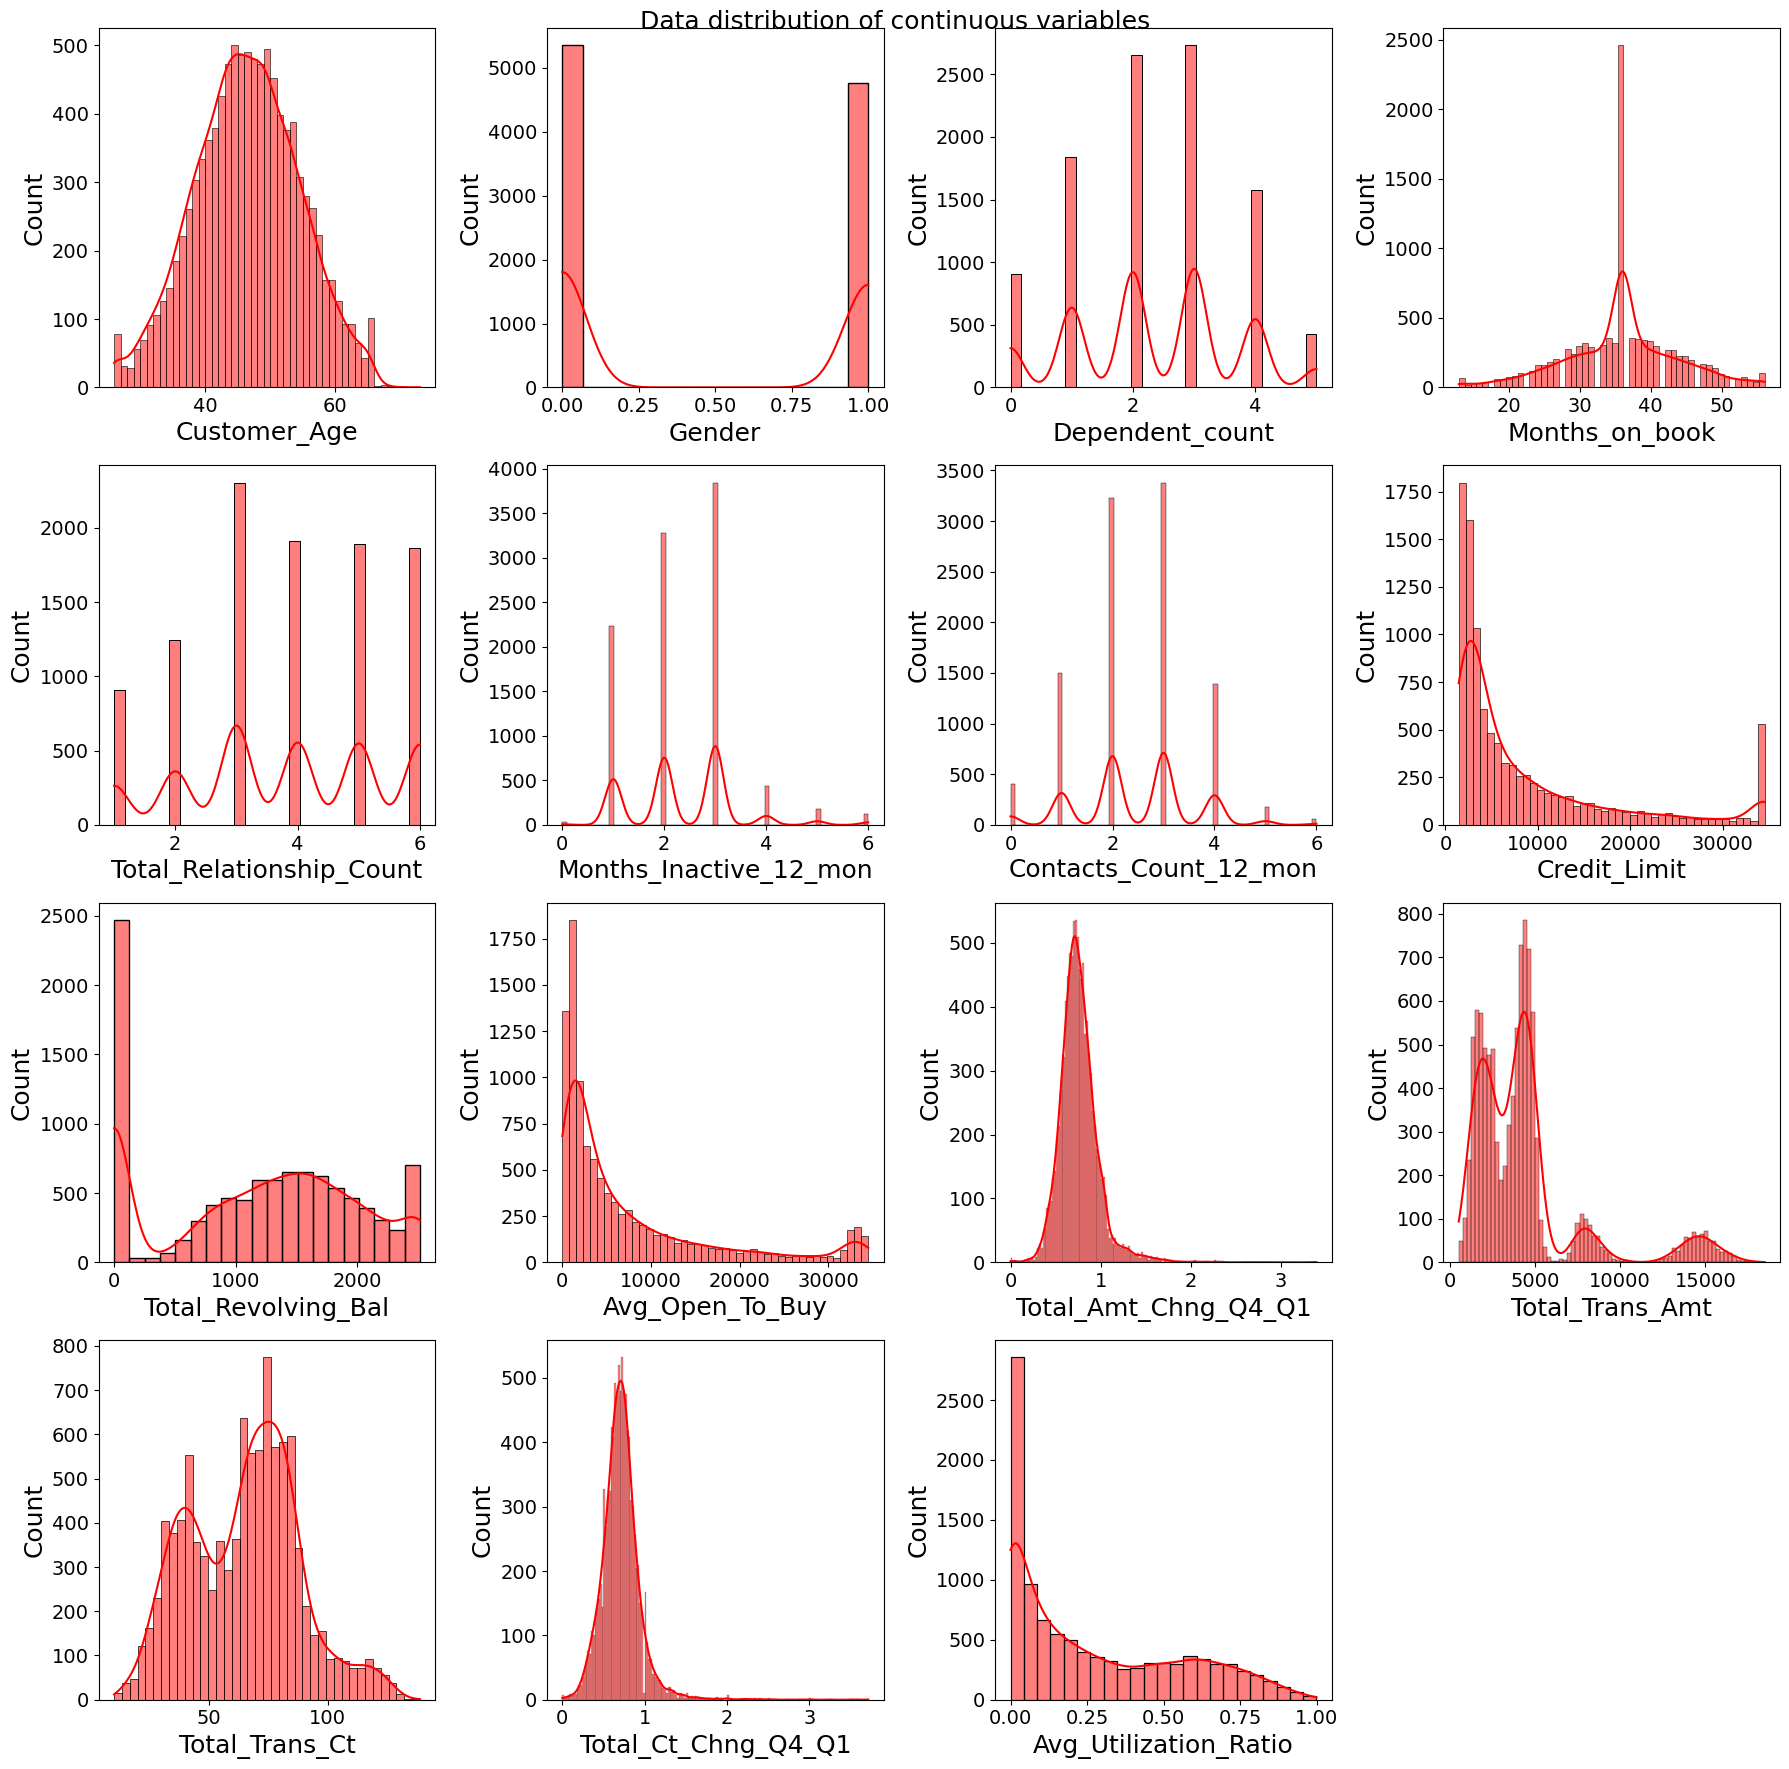

In [15]:
#Exploratory Data Analysis

# As we could see in the data types, we have 13 columns of numerical type.
# Como pudimos ver en el tipo de datos del df reducido, tenemos 13 columnas de tipo numérico.

# In this step, we are checking the distribution of each variable that is continuous.
# En este paso, estamos verificando la distribución de cada variable que es continua.

plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['Attrition_Flag'], axis=1).select_dtypes(include=['int','float']).columns):
    # We exclude the 'y' column and only consider the columns of numerical type.
    # Excluimos la columna 'y' y solo consideramos las columnas de tipo numérico.

    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4, 4, i+1)  # Creating a subplot for each column.
    # Creamos una subfigura para cada columna.

     # Plotting the histogram for each column
    sns.histplot(data=df, x=col, ax=ax, color='red', kde=True)

    # Plotting the KDE curve with custom color and linewidth
    # Plotting the histogram for each column.
    # Graficamos el histograma para cada columna.
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    
plt.suptitle('Data distribution of continuous variables',fontsize=18)
plt.tight_layout()


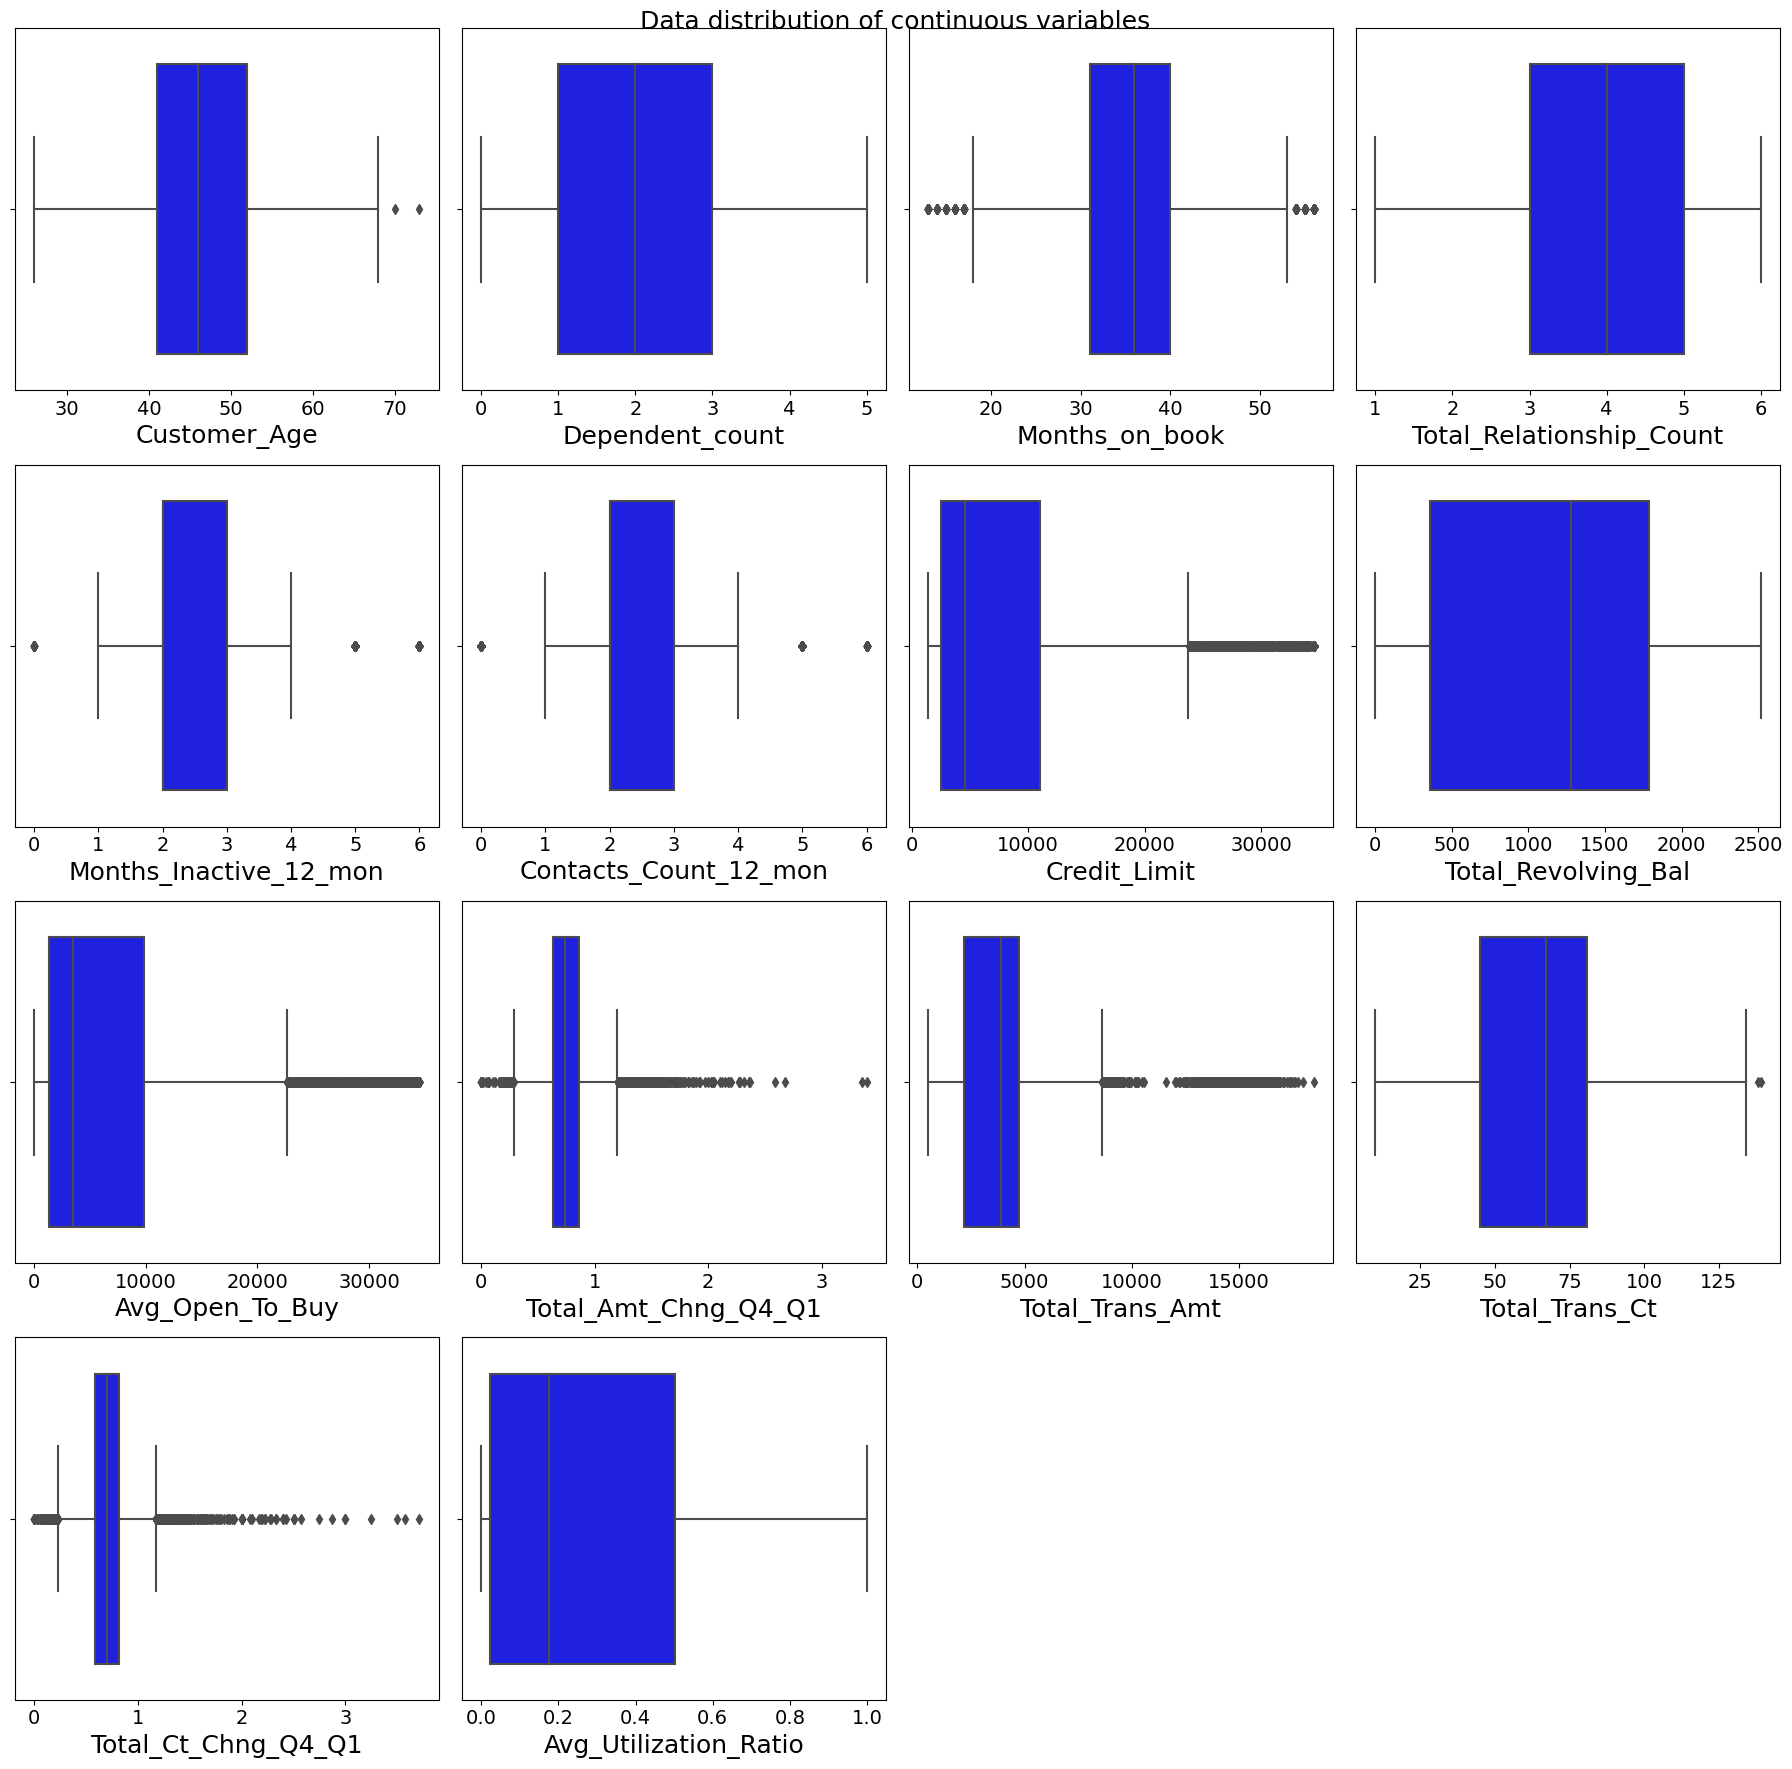

In [16]:
# We can also visualize the data distribution using box plots for each continuous variable.
# También podemos visualizar la distribución de los datos usando gráficos de caja (box plots) para cada variable continua.

plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['Attrition_Flag','Gender'], axis=1).select_dtypes(include=['int', 'float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(data=df, x=col, ax=ax, color='blue')
    ax.tick_params(axis='x', labelsize=14)
    ax.set_xlabel(col, fontsize=18)

plt.suptitle('Data distribution of continuous variables',fontsize=18)
plt.tight_layout()


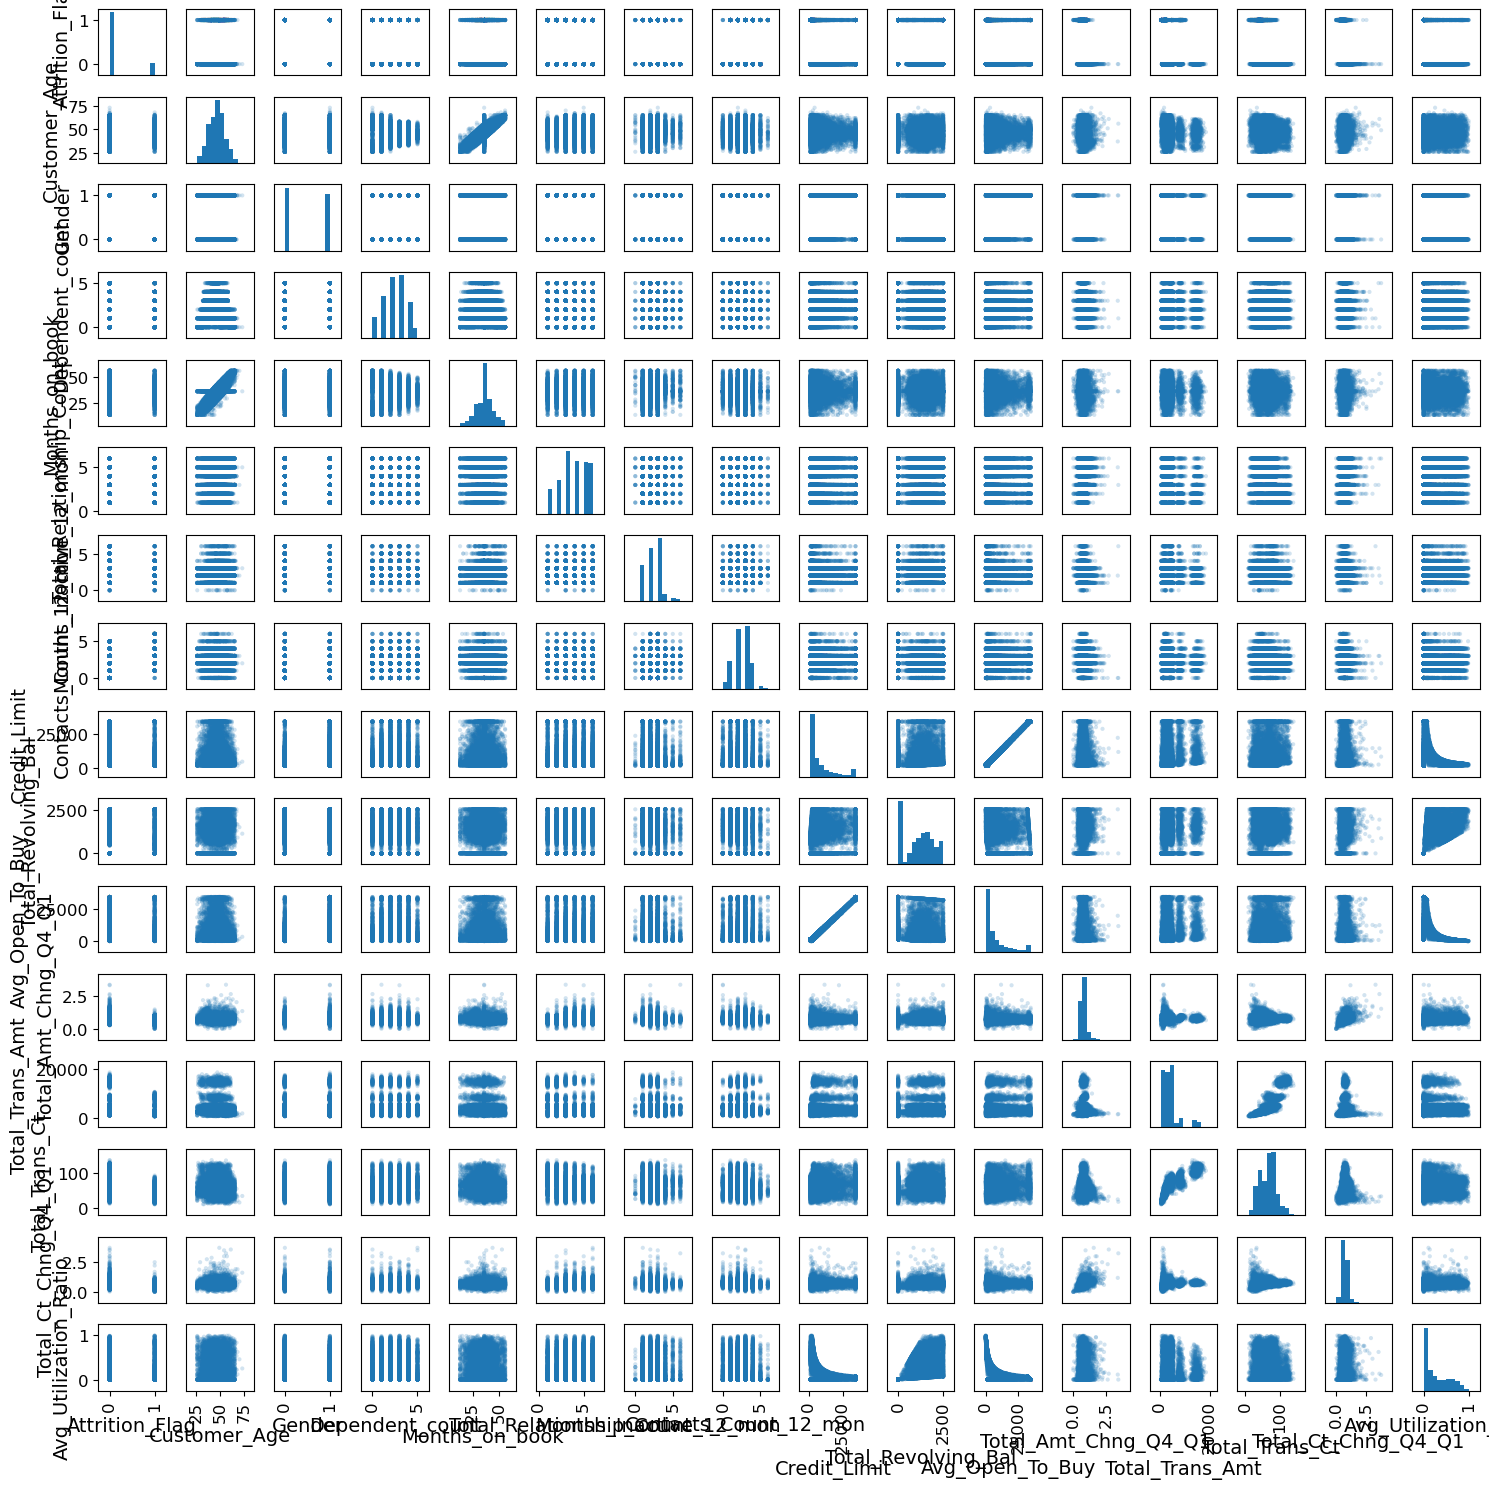

In [17]:
#Multivariate Analysis:
#Multivariate analysis involves exploring the relationships between multiple features and how they relate to the target variable.

#Análisis Multivariado:
#El análisis multivariado implica explorar las relaciones entre múltiples características y cómo se relacionan con la variable objetivo.

#We can visually observe if there is any correlation among the numerical variables.
#Podemos observar gráficamente si existe alguna correlación entre alguna de las variables númericas
import pandas as pd
# Get only the numeric columns from the DataFrame
# Obtener solo las columnas numéricas del DataFrame
num_columns = df.select_dtypes(include=['int64', 'float64'])

# Create the scatter matrix using pandas.plotting.scatter_matrix
# Crear la matriz de dispersión utilizando pandas.plotting.scatter_matrix
scatter_matrix = pd.plotting.scatter_matrix(num_columns, alpha=0.2,
                                            grid=False, diagonal='hist', marker='.',
                                            range_padding=0.5, figsize=(15, 15))


# Adjust axis labels to avoid overlap and change label size
for ax in scatter_matrix.flatten():
    ax.tick_params(axis='both', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)

# Adjust axis labels to avoid overlap
# Ajustar las etiquetas de los ejes para evitar la superposición
plt.tight_layout()

# Show the scatter matrix
# Mostrar la matriz de dispersión
plt.show()


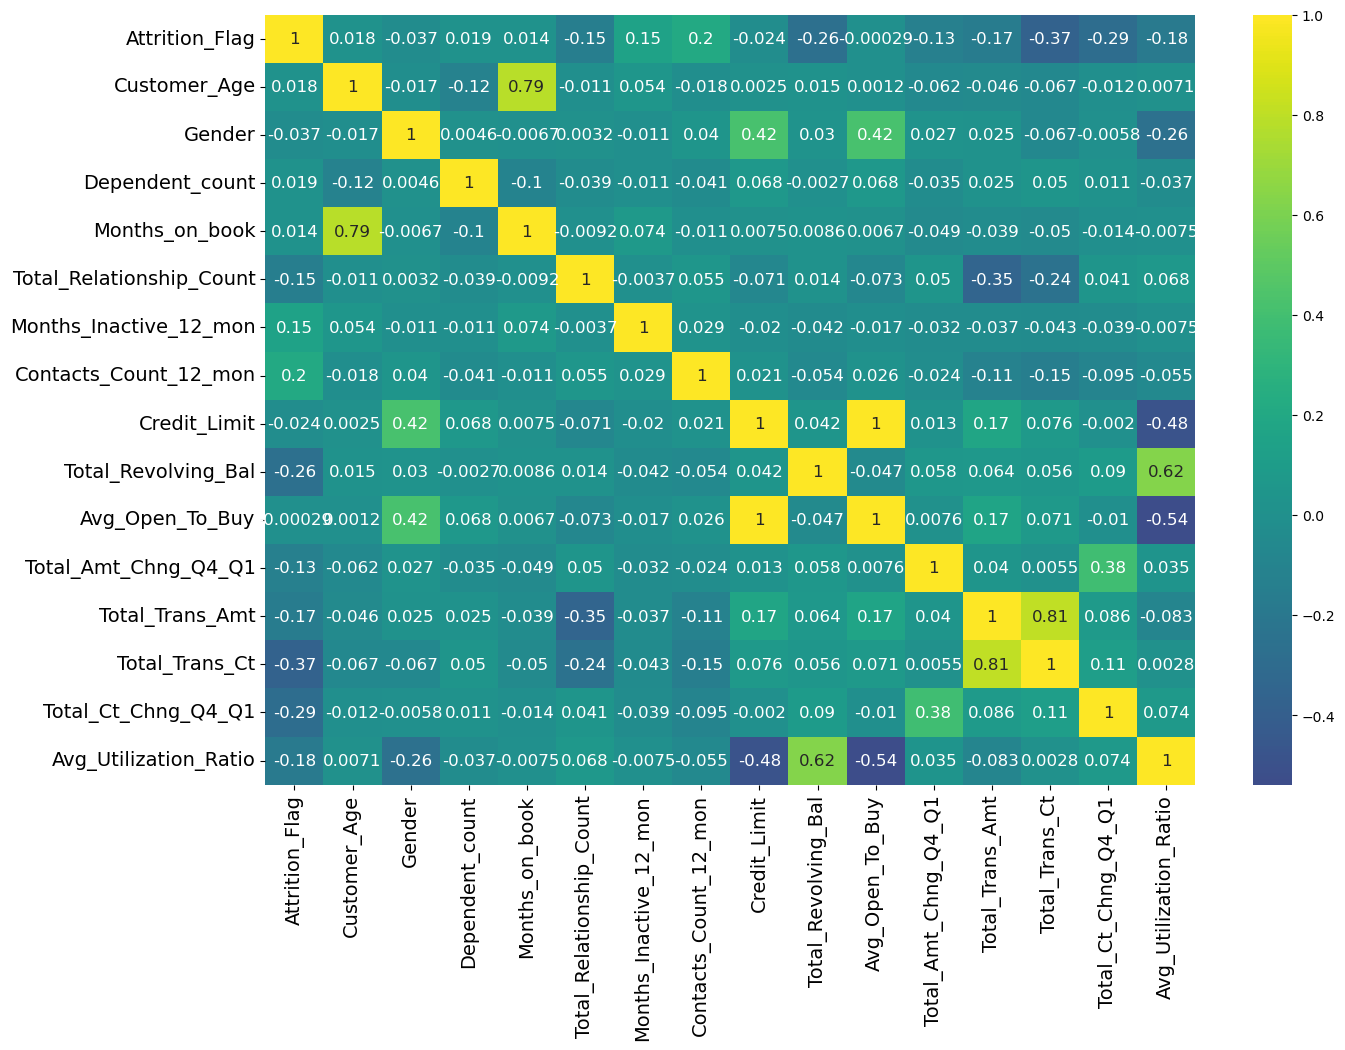

In [18]:
# We can visualize the correlations between variables using a correlation matrix heatmap
# Podemos visualizar las correlaciones entre variables utilizando una matriz de correlación (heatmap)
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



In [19]:
#Multicollinearity: Multicollinearity occurs when two or more independent variables in a regression model are highly correlated.
#This can make the interpretation of variable coefficients difficult and can make the model less stable and less reliable.

#We can observe a strong correlation between #Customer_Age and #Months_on_book, as well as between #Credit_Limit and #Avg_Open_To_Buy,
#and also between #Total_Trans_Ct and #Total_Trans_Amt. Due to this, we will proceed to remove the columns #Months_on_book, #Avg_Open_To_Buy,
#and #Total_Trans_Ct.


#Multicolinealidad: La multicolinealidad ocurre cuando dos o más variables independientes en un modelo de regresión están altamente
#correlacionadas. Esto puede dificultar la interpretación de los coeficientes de las variables y hacer que el modelo sea menos estable
#y menos confiable.

#Podemos observar que hay una correlación muy fuerte entre #Customer_Age y Months_on_book; también entre #Credit_Limit y #Avg_Open_To_Buy;
#como también entre #Total_Trans_Ct y #Total_Trans_Amt. Por lo anterior procederemos a eliminar la columnas #Months_on_book, #Avg_Open_To_Buy y
##Total_Trans_Ct
df = df.drop('Months_on_book', axis = 1)
df = df.drop('Avg_Open_To_Buy', axis = 1)
df = df.drop('Total_Trans_Ct', axis = 1)
df.head()


Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               0            45       1                3     High School   
1               0            49       0                5        Graduate   
2               0            51       1                3        Graduate   
3               0            40       0                4     High School   
4               0            40       1                3      Uneducated   

  Marital_Status Income_Category Card_Category  Total_Relationship_Count  \
0        Married     $60K - $80K          Blue                         5   
1         Single  Less than $40K          Blue                         6   
2        Married    $80K - $120K          Blue                         4   
3        Unknown  Less than $40K          Blue                         3   
4        Married     $60K - $80K          Blue                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                  777                 1.335             1144   
1                  864                 1.541             1291   
2                    0                 2.594             1887   
3                 2517                 1.405             1171   
4                    0                 2.175              816   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                1.625                  0.061  
1                3.714                  0.105  
2                2.333                  0.000  
3                2.333                  0.760  
4                2.500                  0.000

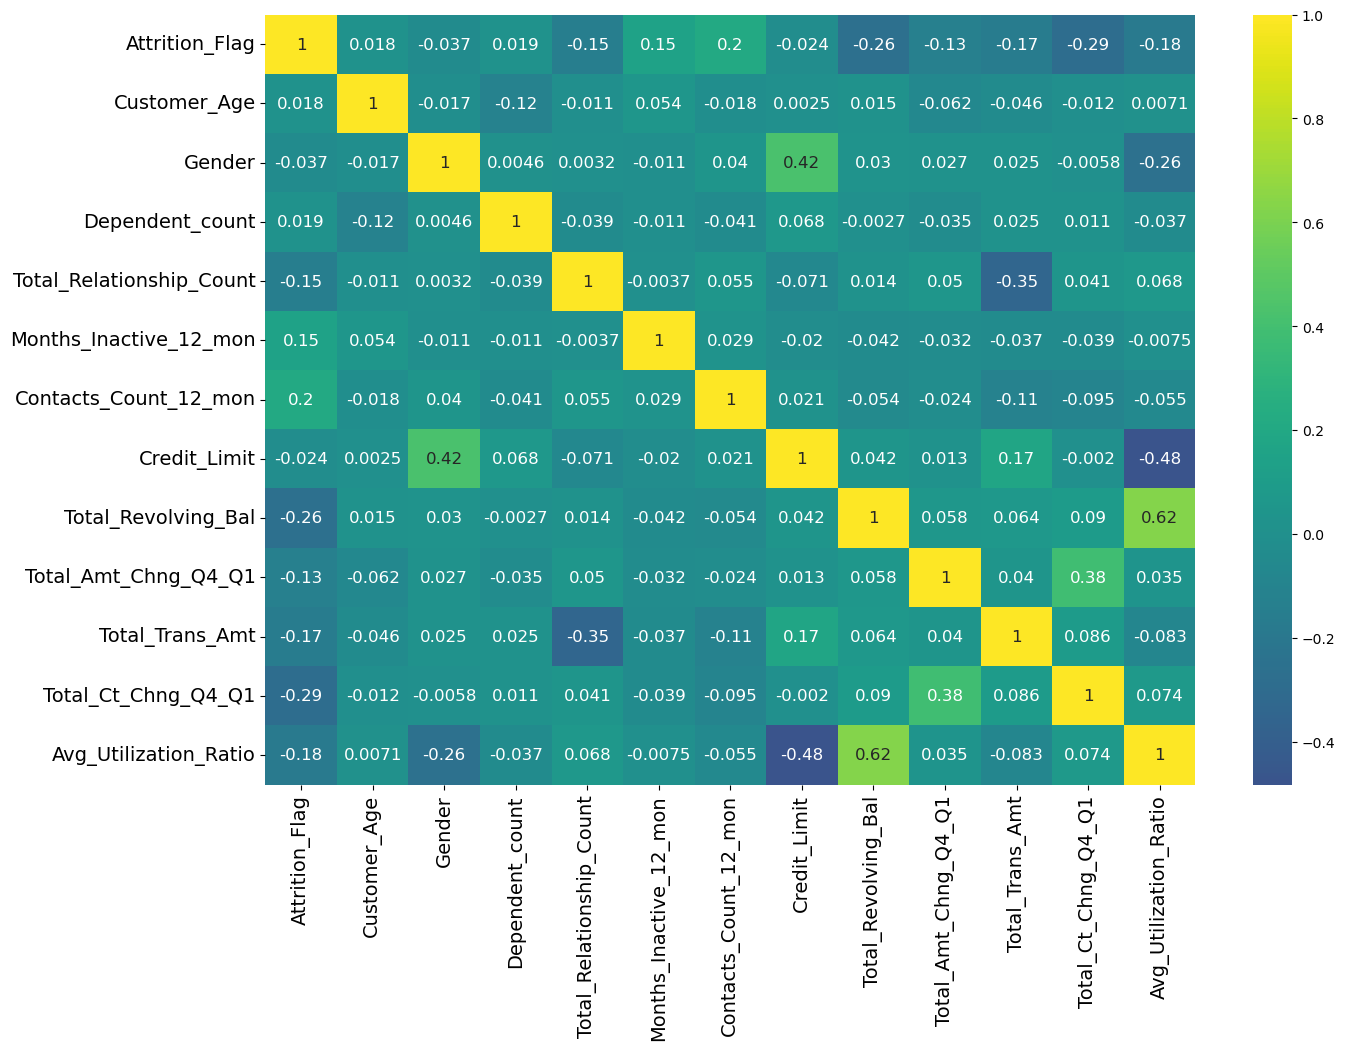

In [20]:


# We can visualize the correlations between variables using a correlation matrix heatmap
# Podemos visualizar las correlaciones entre variables utilizando una matriz de correlación (heatmap)
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


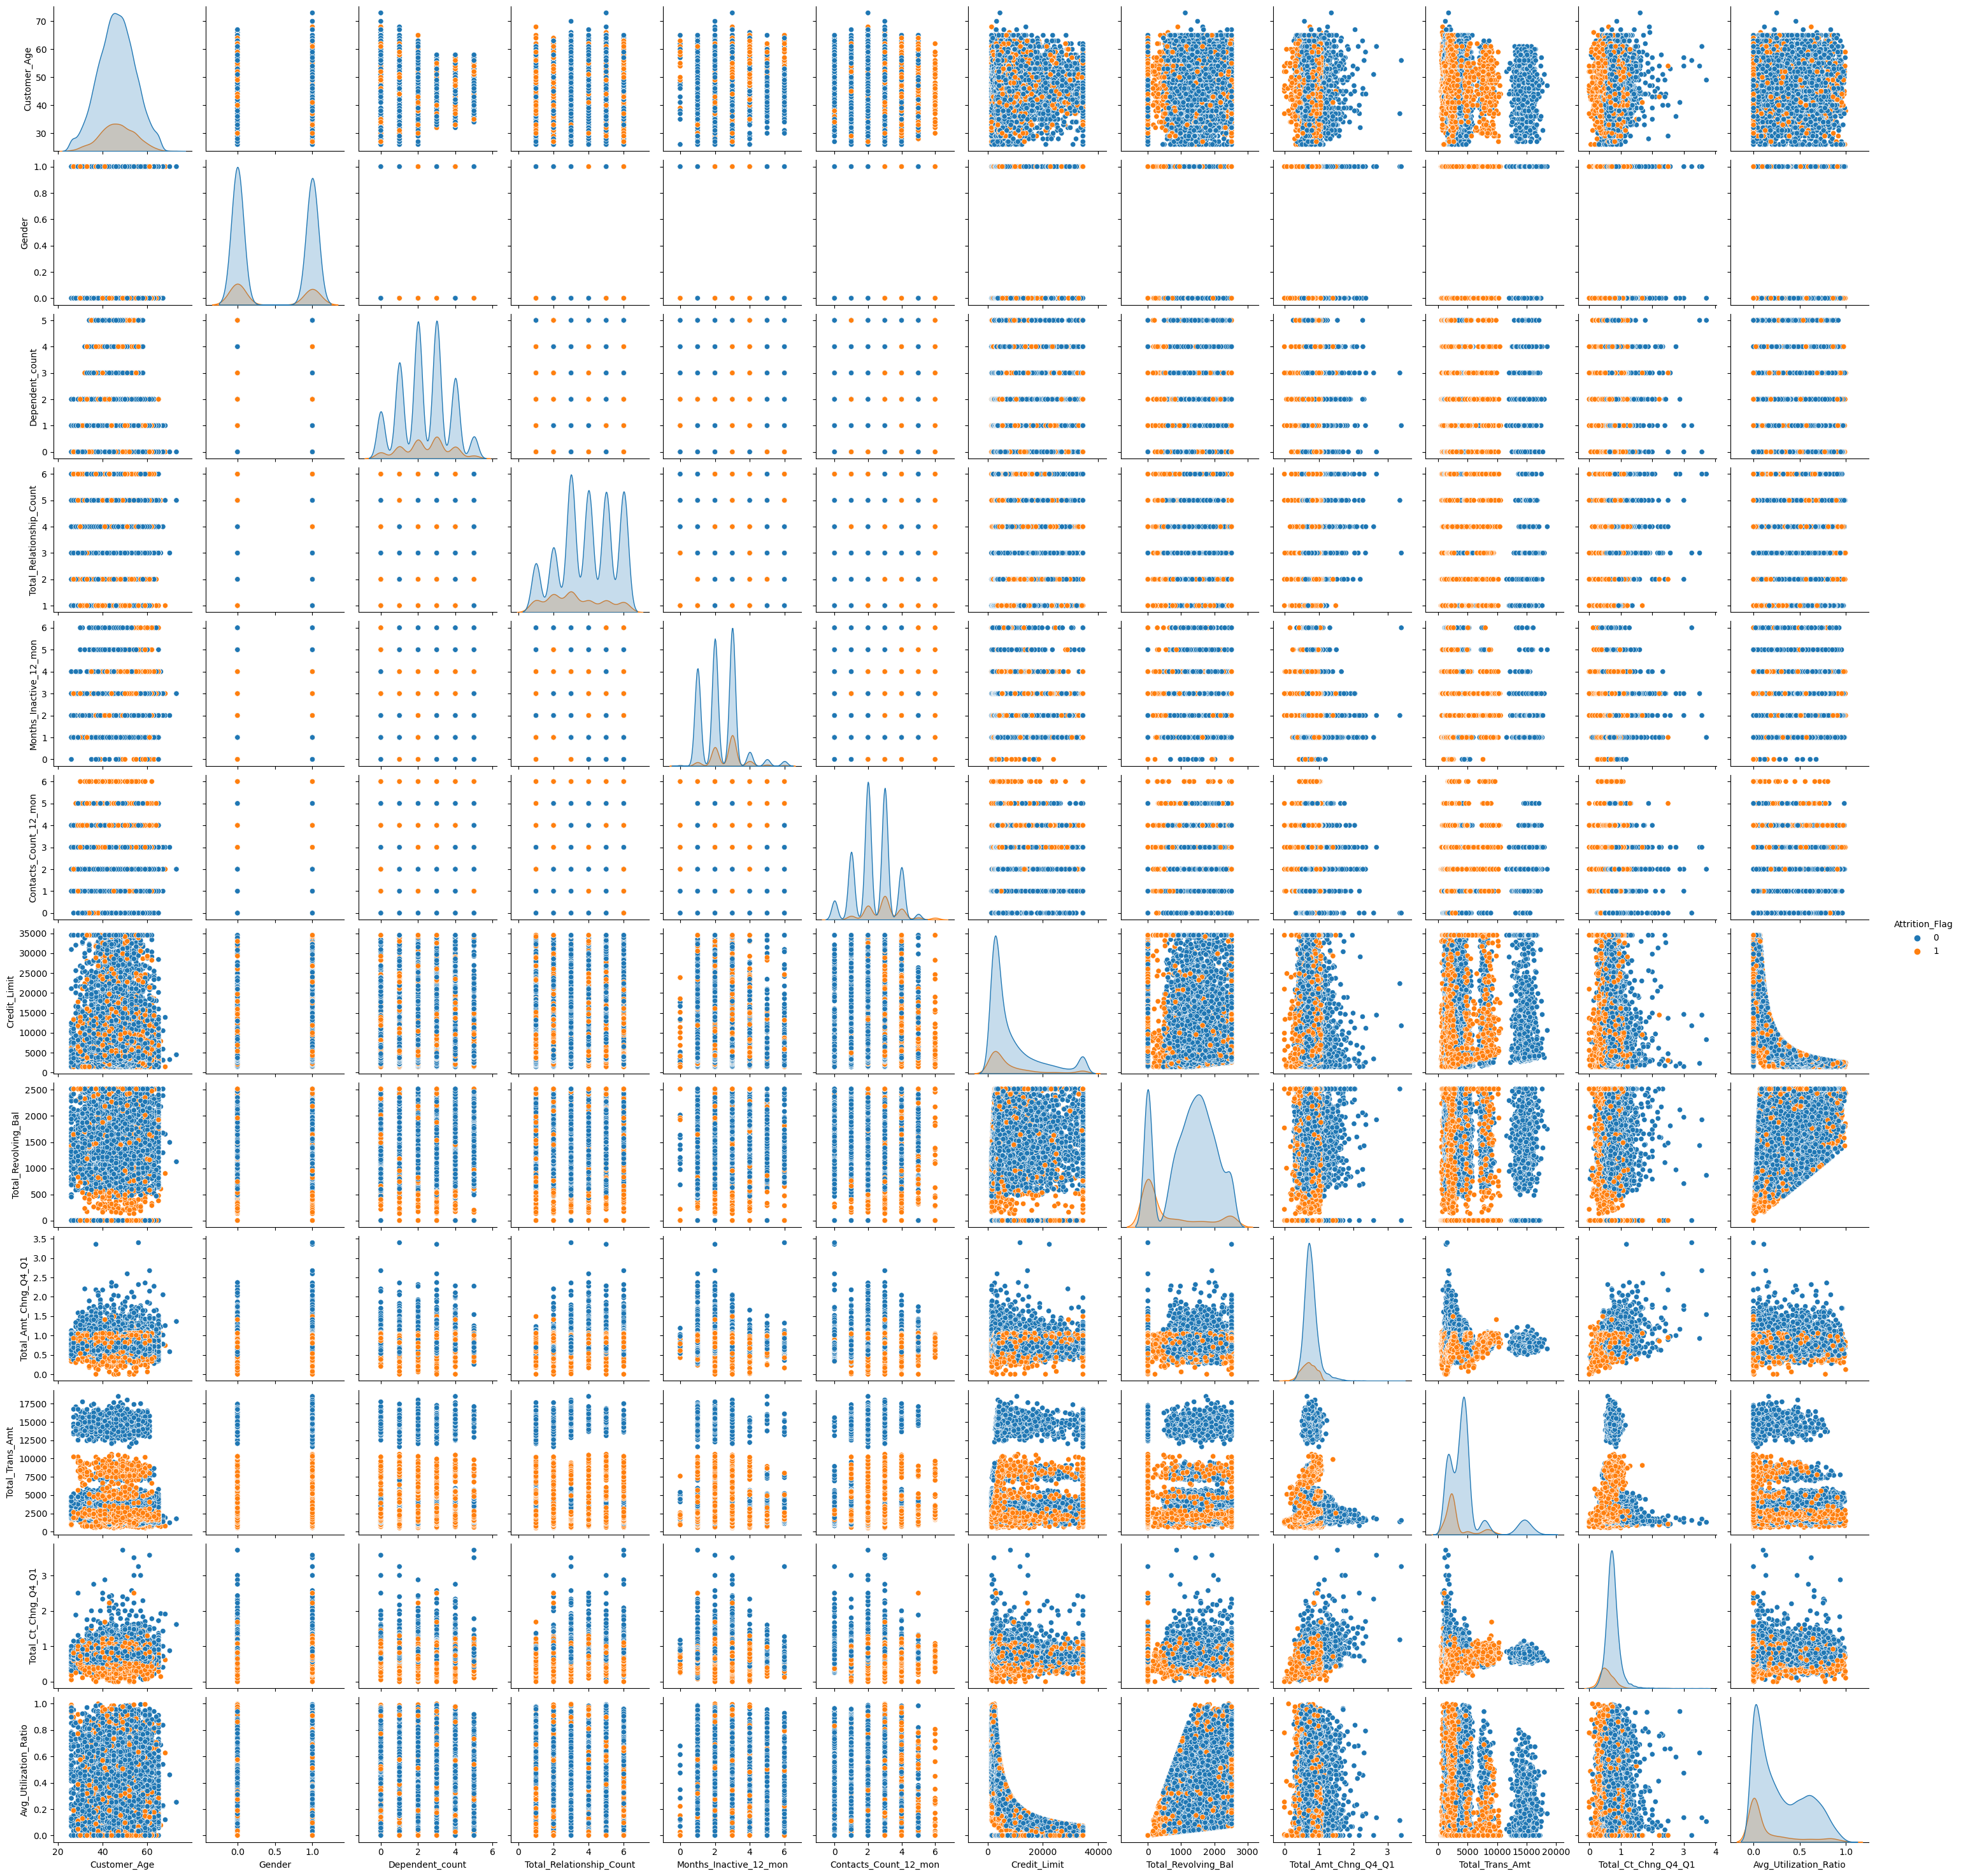

In [21]:

#In general, pair scatter plots are a useful tool to visually explore relationships and patterns in your data, especially when they are
#color-coded based on a target variable. They can help you make informed decisions about which variables to consider for your model and how 
#to interpret their relationships with the target variable.

#We can observe the behavior of numerical variables with respect to the target variable to find interesting patterns, all in a single execution.

#En general, los gráficos de dispersión de pares son una herramienta útil para explorar visualmente las relaciones y patrones en tus datos,
#especialmente cuando se colorean en función de una variable objetivo. Pueden ayudarte a tomar decisiones informadas sobre qué variables
#considerar para tu modelo y cómo interpretar sus relaciones con la variable objetivo.

#Podemos observar el comportamiento de las variables tipo númerico respecto a la variable objetivo para buscar patrones interesantes,
#esto en una sola ejecución

import seaborn as sns
sns.pairplot(df, hue='Attrition_Flag')
plt.show()


In [22]:
#Analyzing these graphs visually, we can observe clear clustering patterns for certain variables. These are of interest when the patterns
#for a variable show different shapes according to the target variable (Color).
#For example, if we look at the diagonal graph of credit limit, those who decide to leave the bank are those with a low credit limit.
#Those who have a high credit limit decide not to leave the bank (peak in the blue graph). When plotting credit limit vs other variables,
#we can find interesting clustering patterns.
#At first glance, the following variables seem to have a significant impact on determining whether a customer stays or not:
#Customer_Age, Credit_Limit, Total_Revolving_Balance, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio.


#Analizando visualmente estás gráficas podemos observar patrones de agrupamiento claros para ciertas variables, son de interés donde
#los patrones para alguna variable muestran distinta forma de acuerdo a la variable objetivo (Color). 
#Por ejemplo, si vemos la gráfica en la diagonal de credit limit, aquellos que deciden a dejar el banco son aquellos que tienen un crédito límite
#bajo. Aquellos que tienen un crédito alto se deciden a no dejar el bancoo (pico en la gráfica azul). Al graficar credit limit vs otras variables
#podemos encontrar patrones de agrupamiento interesante.
#A simple vista parecen tener gran peso para la determinación de la permanencia o no las siguientes variables; Customer_Age,Credit_Limit,
#Total_Recovering_Bal, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio

df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               0            45       1                3     High School   
1               0            49       0                5        Graduate   
2               0            51       1                3        Graduate   
3               0            40       0                4     High School   
4               0            40       1                3      Uneducated   

  Marital_Status Income_Category Card_Category  Total_Relationship_Count  \
0        Married     $60K - $80K          Blue                         5   
1         Single  Less than $40K          Blue                         6   
2        Married    $80K - $120K          Blue                         4   
3        Unknown  Less than $40K          Blue                         3   
4        Married     $60K - $80K          Blue                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                  777                 1.335             1144   
1                  864                 1.541             1291   
2                    0                 2.594             1887   
3                 2517                 1.405             1171   
4                    0                 2.175              816   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                1.625                  0.061  
1                3.714                  0.105  
2                2.333                  0.000  
3                2.333                  0.760  
4                2.500                  0.000

In [23]:
#Univariate Analysis (for caterorical variables with múltiple values)
#Univariate analysis refers to the examination and study of a single variable in isolation, without considering its relationship with other variables.

#Análisis Univariado (para variables categóricas con múltiples valores)
#El análisis univariado se refiere al examen y estudio de una sola variable de manera aislada, sin considerar su relación con otras variables.

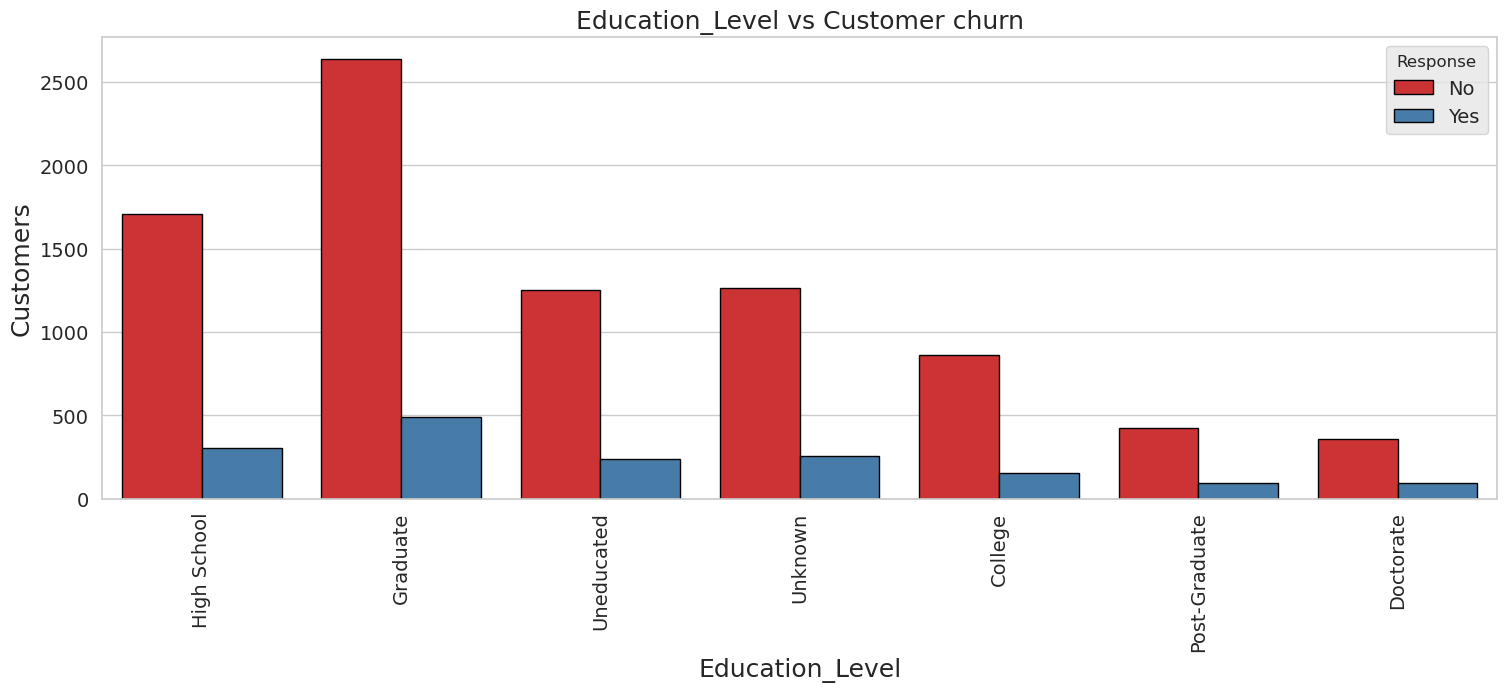

In [24]:
#Education level
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.countplot(x="Education_Level", data=df,hue='Attrition_Flag',edgecolor='black')
plt.xlabel("Education_Level",fontsize=18)
plt.ylabel("Customers",fontsize=18)
plt.title("Education_Level vs Customer churn",fontsize=18)
legend = plt.legend(title="Response", labels=["No", "Yes"], fontsize=14)
legend.get_frame().set_facecolor('0.9')
legend.get_frame().set_alpha(0.8)
#plt.legend(title="Response", labels=["No", "Yes"],fontsize=16)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [25]:
# Calculate the percentages of "Yes" and "No" responses for each education level
education_percents = df.groupby('Education_Level')['Attrition_Flag'].value_counts(normalize=True).unstack()
education_percents.reset_index(inplace=True)
education_percents.fillna(0, inplace=True)  # Fill with 0 for missing values

# Create a DataFrame with the percentages of "No" and "Yes" responses for each Education_Level value
education_percent_table = education_percents.rename(columns={0: 'No_Percentage', 1: 'Yes_Percentage'})

# Format the percentages as percentage notation
education_percent_table['No_Percentage'] = education_percent_table['No_Percentage'].apply(lambda x: f"{x:.2%}")
education_percent_table['Yes_Percentage'] = education_percent_table['Yes_Percentage'].apply(lambda x: f"{x:.2%}")

# Sort the table in descending order based on the "Yes_Percentage" value
education_percent_table = education_percent_table.sort_values(by='Yes_Percentage', ascending=False)

# Print the percentage table without the index column
print(education_percent_table[['Education_Level', 'No_Percentage', 'Yes_Percentage']].to_string(index=False))


Education_Level No_Percentage Yes_Percentage
      Doctorate        78.94%         21.06%
  Post-Graduate        82.17%         17.83%
        Unknown        83.15%         16.85%
     Uneducated        84.06%         15.94%
       Graduate        84.43%         15.57%
        College        84.80%         15.20%
    High School        84.80%         15.20%


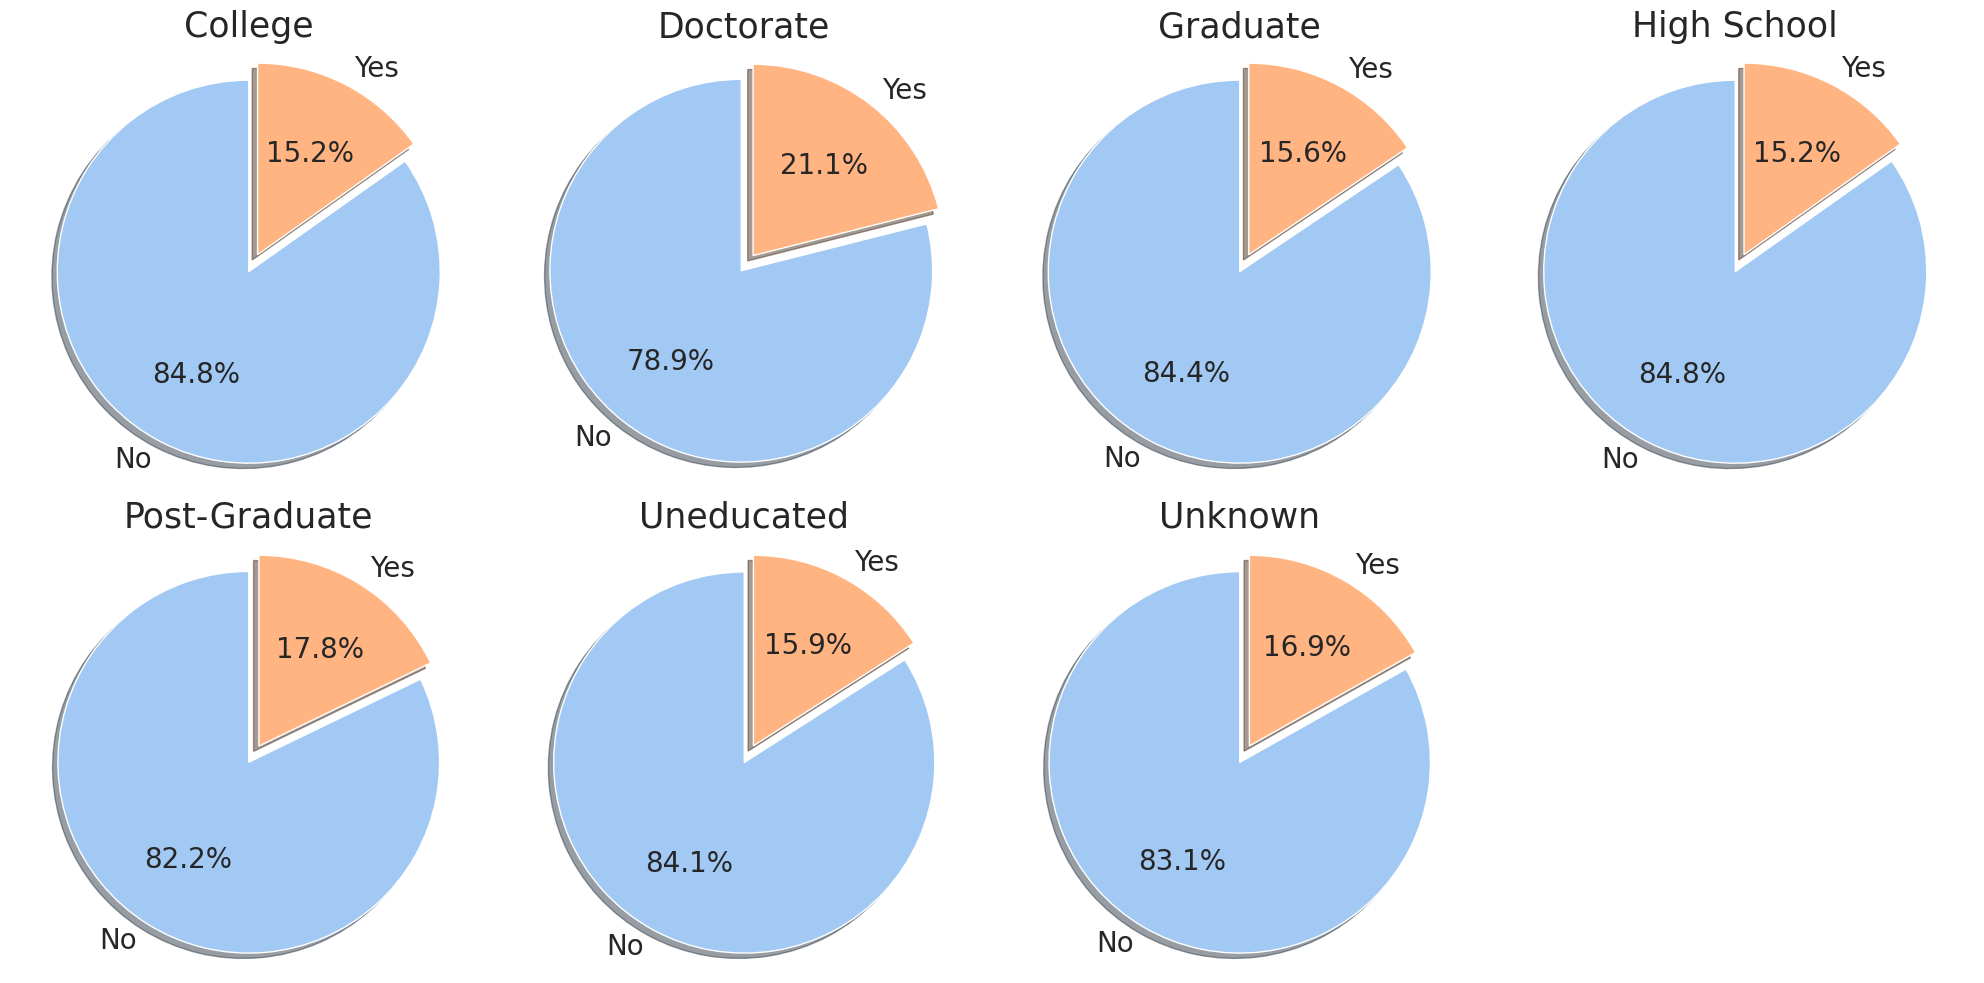

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentages of "Yes" and "No" responses for each education level
education_percents = df.groupby('Education_Level')['Attrition_Flag'].value_counts(normalize=True).unstack()
education_percents.reset_index(inplace=True)
education_percents.fillna(0, inplace=True)  # Fill with 0 for missing values

# Create a DataFrame with the percentages of response 0 and 1 for each Education_Level value
education_percent_table = education_percents.rename(columns={0: 'No_Percentage', 1: 'Yes_Percentage'})

# Format percentages as percentage notation
education_percent_table['No_Percentage'] = education_percent_table['No_Percentage'].apply(lambda x: x * 100)
education_percent_table['Yes_Percentage'] = education_percent_table['Yes_Percentage'].apply(lambda x: x * 100)

# Sort the table in descending order of "Yes_Percentage"
education_percent_table = education_percent_table.sort_values(by='Yes_Percentage', ascending=False)

# Use the "pastel" color palette from Seaborn
custom_palette = sns.color_palette("pastel")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the array of subplots for iteration
axes = axes.flatten()

# Create donut charts for each education level in descending order of Yes_Percentage
for index, row in education_percent_table.iterrows():
    labels = ['No', 'Yes']
    sizes = [row['No_Percentage'], row['Yes_Percentage']]
    explode = (0.1, 0)  # Explode the first slice (No)

    ax = axes[index]
    patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=custom_palette,
                                       autopct='%1.1f%%', shadow=True, startangle=90,
                                       textprops={'fontsize': 18})
    for text in texts:
        text.set_fontsize(20)
    for autotext in autotexts:
        autotext.set_fontsize(20)

    ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    ax.set_title(row['Education_Level'], fontsize=25)

# Remove unused subplots
for i in range(len(education_percent_table), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [27]:
#We can observe that people with higher levels of education tend to leave the bank more frequently.
#Podemos observar que la gente con mas estudios abandona con mas frecuencia el banco.

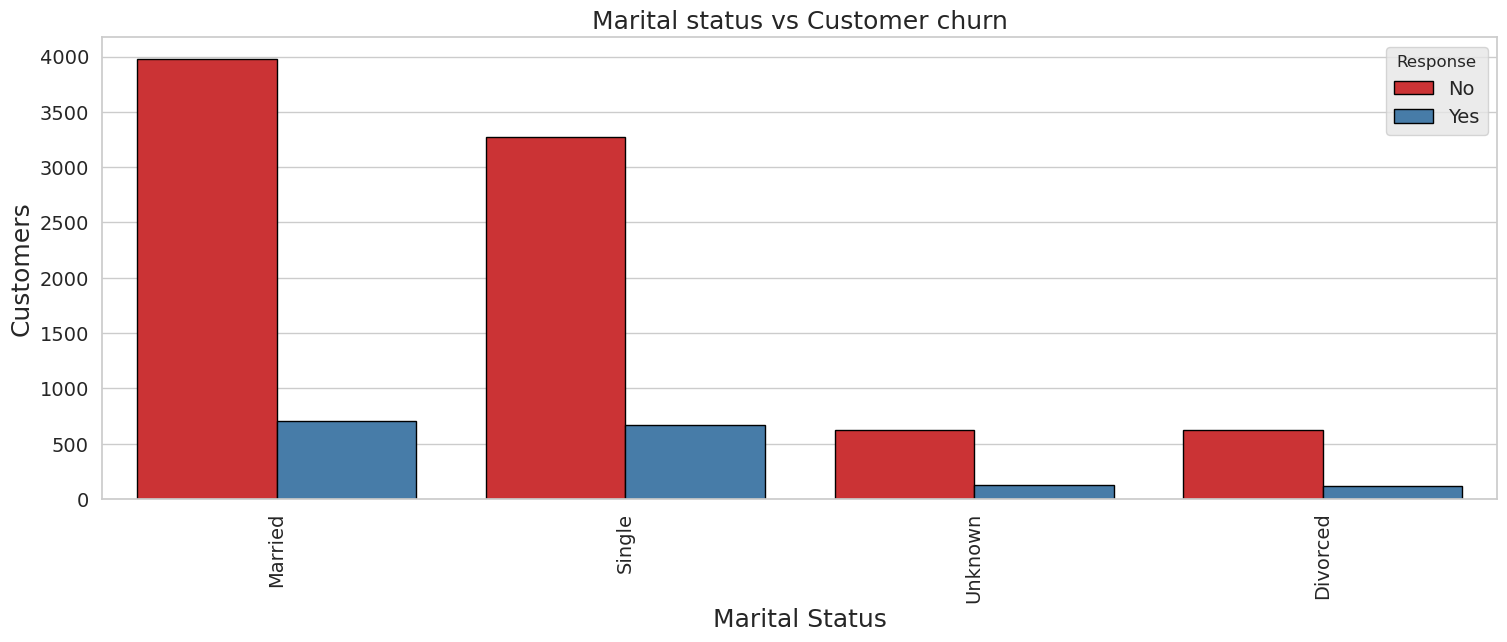

In [28]:
#Marital_Status
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.countplot(x="Marital_Status", data=df,hue='Attrition_Flag',edgecolor='black')
plt.xlabel("Marital Status",fontsize=18)
plt.ylabel("Customers",fontsize=18)
plt.title("Marital status vs Customer churn",fontsize=18)
legend = plt.legend(title="Response", labels=["No", "Yes"], fontsize=14)
legend.get_frame().set_facecolor('0.9')
legend.get_frame().set_alpha(0.8)
#plt.legend(title="Response", labels=["No", "Yes"],fontsize=16)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

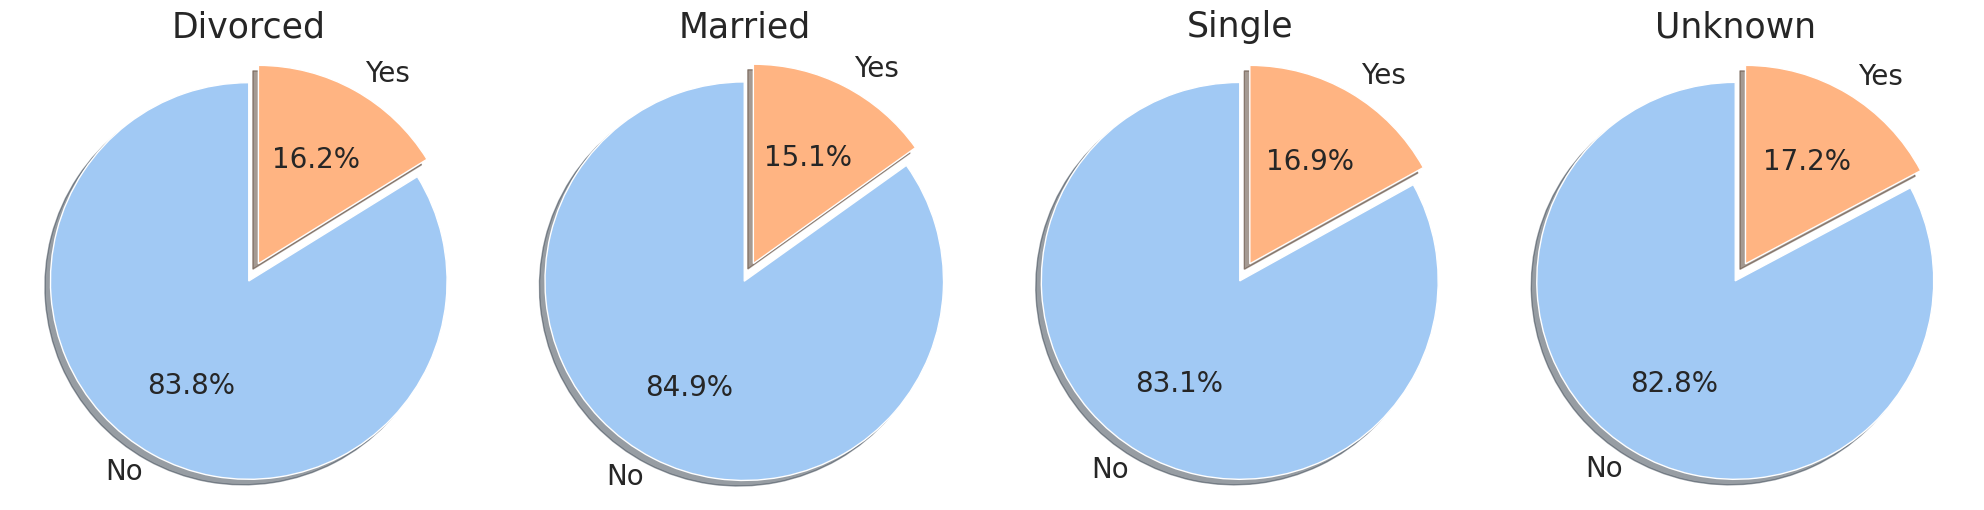

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentages of "Yes" and "No" responses for each Marital status
marital_percents = df.groupby('Marital_Status')['Attrition_Flag'].value_counts(normalize=True).unstack()
marital_percents.reset_index(inplace=True)
marital_percents.fillna(0, inplace=True)  # Fill with 0 for missing values

# Create a DataFrame with the percentages of response 0 and 1 for each Marital_status value
marital_percent_table = marital_percents.rename(columns={0: 'No_Percentage', 1: 'Yes_Percentage'})

# Format percentages as percentage notation
marital_percent_table['No_Percentage'] = marital_percent_table['No_Percentage'].apply(lambda x: x * 100)
marital_percent_table['Yes_Percentage'] = marital_percent_table['Yes_Percentage'].apply(lambda x: x * 100)

# Sort the table in descending order of "Yes_Percentage"
marital_percent_table = marital_percent_table.sort_values(by='Yes_Percentage', ascending=False)

# Use the "pastel" color palette from Seaborn
custom_palette = sns.color_palette("pastel")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the array of subplots for iteration
axes = axes.flatten()

# Create donut charts for each marital status in descending order of Yes_Percentage
for index, row in marital_percent_table.iterrows():
    labels = ['No', 'Yes']
    sizes = [row['No_Percentage'], row['Yes_Percentage']]
    explode = (0.1, 0)  # Explode the first slice (No)

    ax = axes[index]
    patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=custom_palette,
                                       autopct='%1.1f%%', shadow=True, startangle=90,
                                       textprops={'fontsize': 18})
    for text in texts:
        text.set_fontsize(20)
    for autotext in autotexts:
        autotext.set_fontsize(20)

    ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    ax.set_title(row['Marital_Status'], fontsize=25)

# Remove unused subplots
for i in range(len(marital_percent_table), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


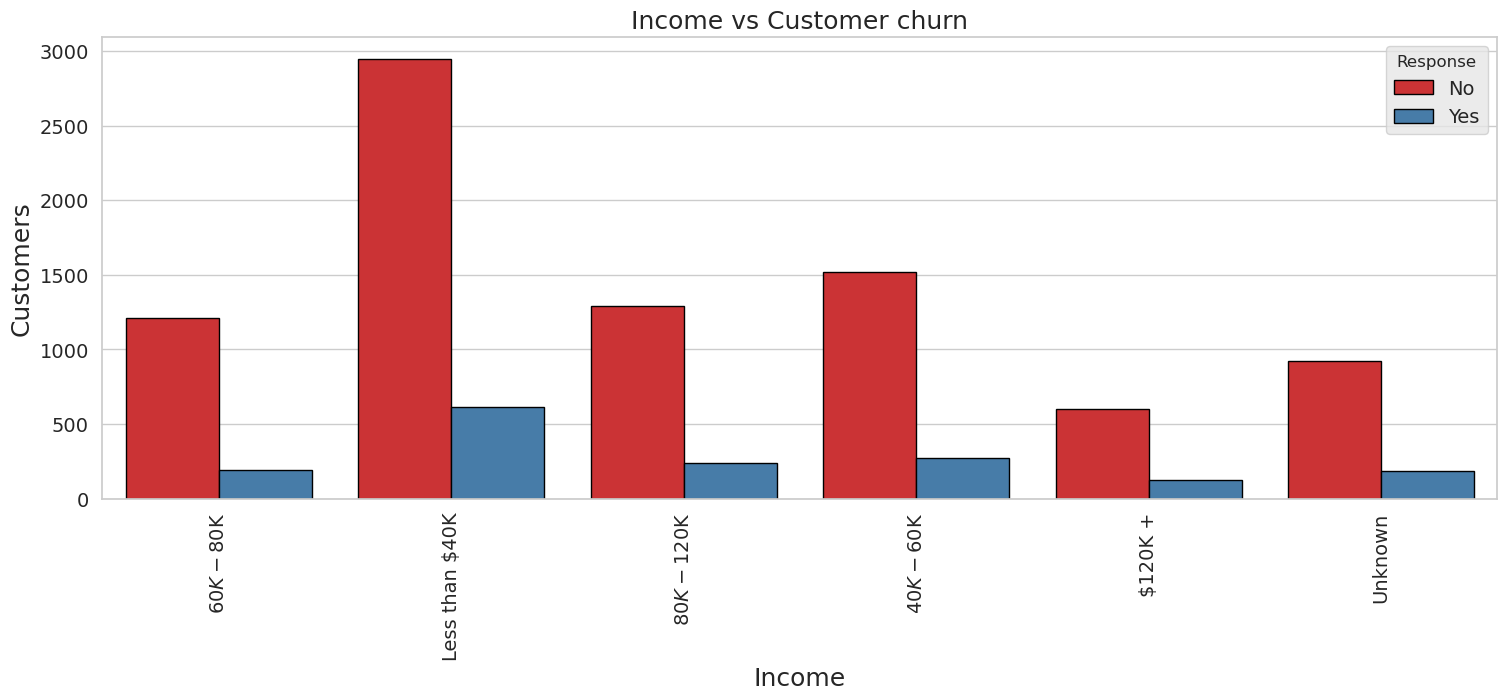

In [30]:
#Income Category
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.countplot(x="Income_Category", data=df,hue='Attrition_Flag',edgecolor='black')
plt.xlabel("Income",fontsize=18)
plt.ylabel("Customers",fontsize=18)
plt.title("Income vs Customer churn",fontsize=18)
legend = plt.legend(title="Response", labels=["No", "Yes"], fontsize=14)
legend.get_frame().set_facecolor('0.9')
legend.get_frame().set_alpha(0.8)
#plt.legend(title="Response", labels=["No", "Yes"],fontsize=16)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

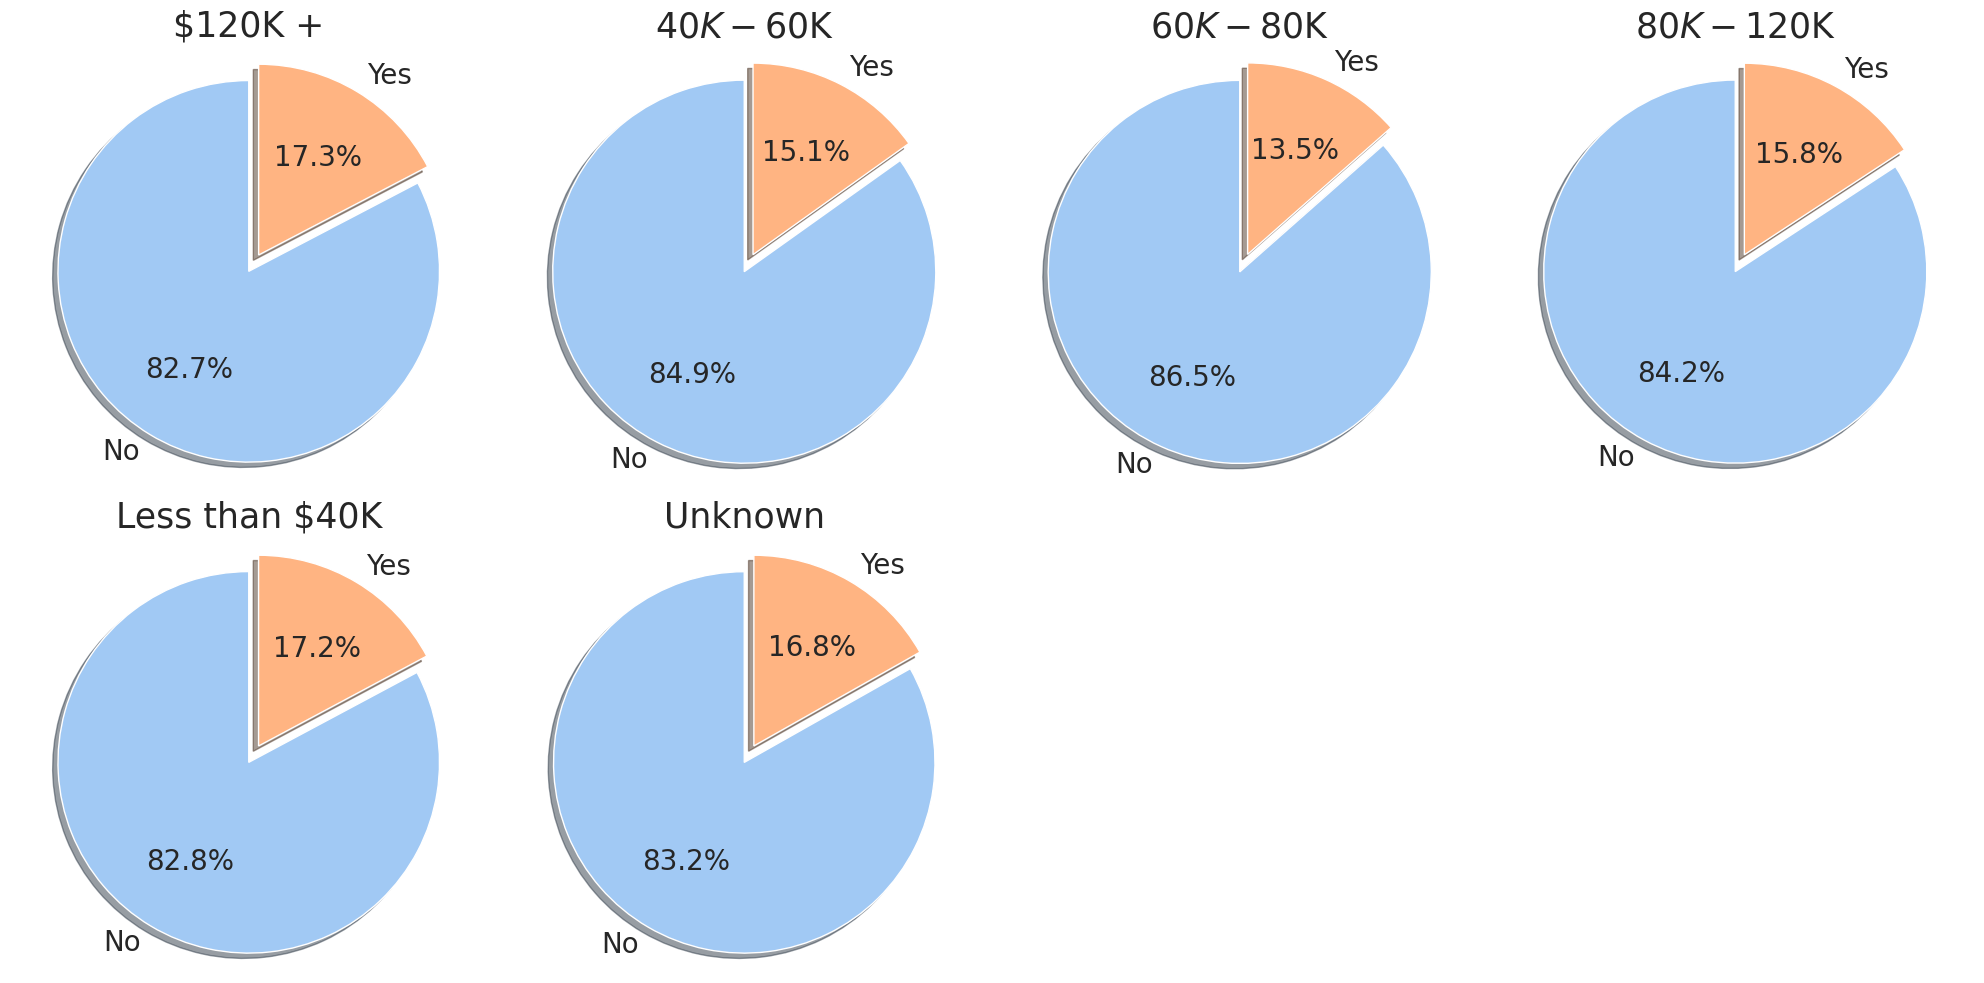

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentages of "Yes" and "No" responses for each Income Category
income_percents = df.groupby('Income_Category')['Attrition_Flag'].value_counts(normalize=True).unstack()
income_percents.reset_index(inplace=True)
income_percents.fillna(0, inplace=True)  # Fill with 0 for missing values

income_percent_table = income_percents.rename(columns={0: 'No_Percentage', 1: 'Yes_Percentage'})

# Format percentages as percentage notation
income_percent_table['No_Percentage'] = income_percent_table['No_Percentage'].apply(lambda x: x * 100)
income_percent_table['Yes_Percentage'] = income_percent_table['Yes_Percentage'].apply(lambda x: x * 100)

# Sort the table in descending order of "Yes_Percentage"
income_percent_table = income_percent_table.sort_values(by='Yes_Percentage', ascending=False)

# Use the "pastel" color palette from Seaborn
custom_palette = sns.color_palette("pastel")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the array of subplots for iteration
axes = axes.flatten()

# Create donut charts for each marital status in descending order of Yes_Percentage
for index, row in income_percent_table.iterrows():
    labels = ['No', 'Yes']
    sizes = [row['No_Percentage'], row['Yes_Percentage']]
    explode = (0.1, 0)  # Explode the first slice (No)

    ax = axes[index]
    patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=custom_palette,
                                       autopct='%1.1f%%', shadow=True, startangle=90,
                                       textprops={'fontsize': 18})
    for text in texts:
        text.set_fontsize(20)
    for autotext in autotexts:
        autotext.set_fontsize(20)

    ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    ax.set_title(row['Income_Category'], fontsize=25)

# Remove unused subplots
for i in range(len(income_percent_table), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


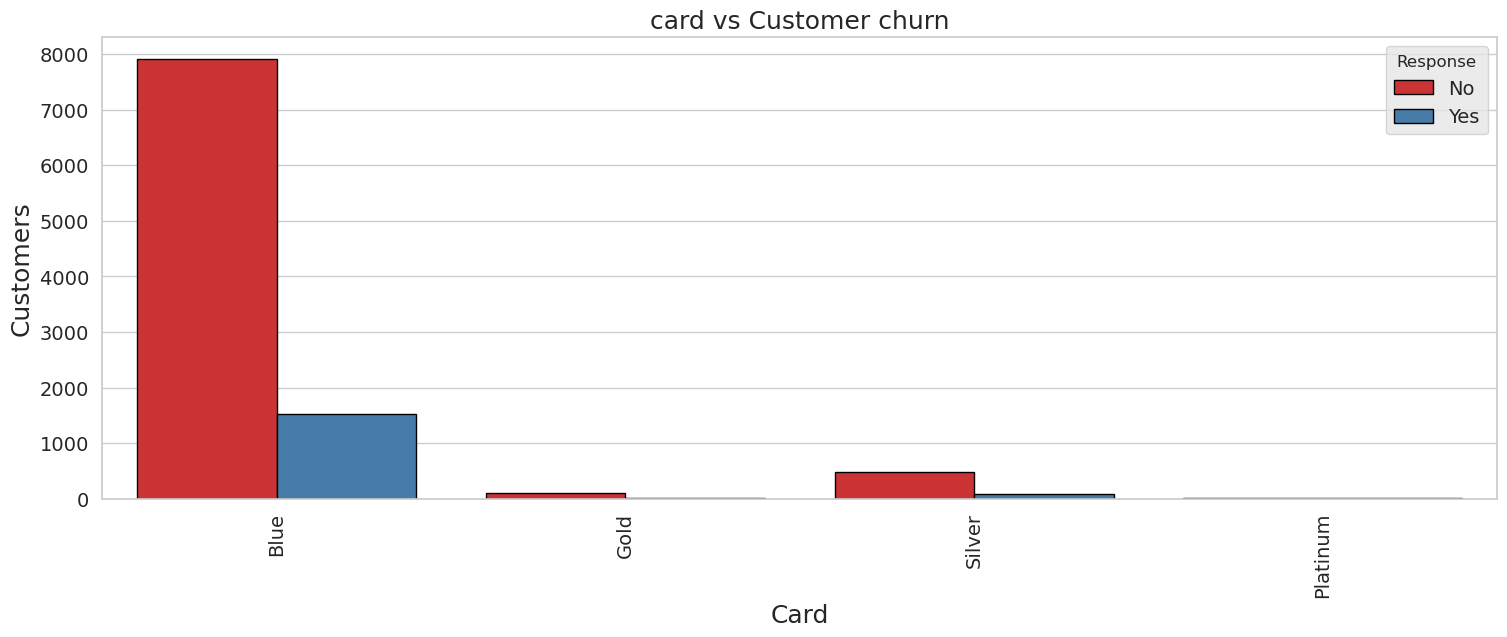

In [32]:
#Card Category
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.countplot(x="Card_Category", data=df,hue='Attrition_Flag',edgecolor='black')
plt.xlabel("Card",fontsize=18)
plt.ylabel("Customers",fontsize=18)
plt.title("card vs Customer churn",fontsize=18)
legend = plt.legend(title="Response", labels=["No", "Yes"], fontsize=14)
legend.get_frame().set_facecolor('0.9')
legend.get_frame().set_alpha(0.8)
#plt.legend(title="Response", labels=["No", "Yes"],fontsize=16)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

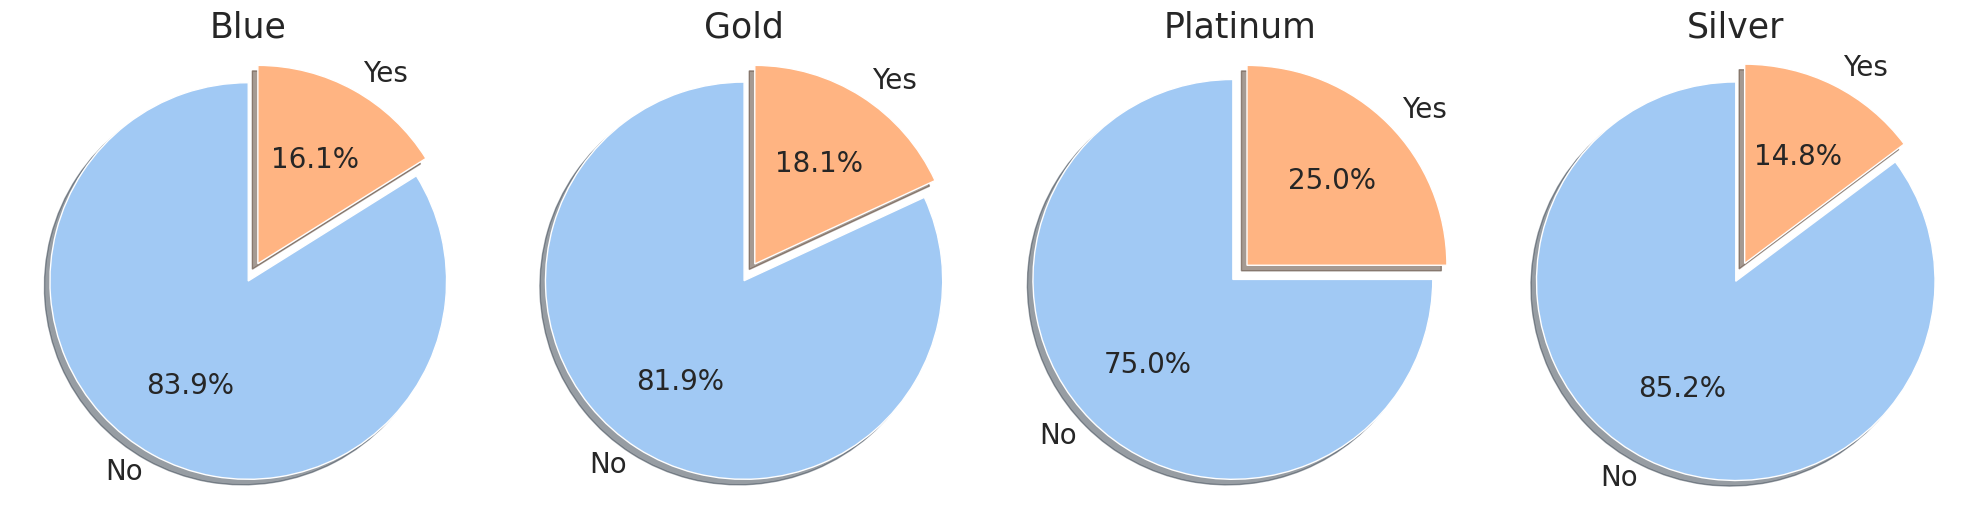

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

card_percents = df.groupby('Card_Category')['Attrition_Flag'].value_counts(normalize=True).unstack()
card_percents.reset_index(inplace=True)
card_percents.fillna(0, inplace=True)  # Fill with 0 for missing values

card_percent_table = card_percents.rename(columns={0: 'No_Percentage', 1: 'Yes_Percentage'})

# Format percentages as percentage notation
card_percent_table['No_Percentage'] = card_percent_table['No_Percentage'].apply(lambda x: x * 100)
card_percent_table['Yes_Percentage'] = card_percent_table['Yes_Percentage'].apply(lambda x: x * 100)

# Sort the table in descending order of "Yes_Percentage"
card_percent_table = card_percent_table.sort_values(by='Yes_Percentage', ascending=False)

# Use the "pastel" color palette from Seaborn
custom_palette = sns.color_palette("pastel")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the array of subplots for iteration
axes = axes.flatten()

# Create donut charts for each marital status in descending order of Yes_Percentage
for index, row in card_percent_table.iterrows():
    labels = ['No', 'Yes']
    sizes = [row['No_Percentage'], row['Yes_Percentage']]
    explode = (0.1, 0)  # Explode the first slice (No)

    ax = axes[index]
    patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=custom_palette,
                                       autopct='%1.1f%%', shadow=True, startangle=90,
                                       textprops={'fontsize': 18})
    for text in texts:
        text.set_fontsize(20)
    for autotext in autotexts:
        autotext.set_fontsize(20)

    ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    ax.set_title(row['Card_Category'], fontsize=25)

# Remove unused subplots
for i in range(len(card_percent_table), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [34]:
#People with the Platinum card tend to discontinue using the bank's services. Are the fees too high, or is the service inadequate for the annual
#fee paid?

#Las personas con la tarjeta Platinum tienden a dejar los servicios del banco. ¿Comisiones muy altas o servicio malo para el tipo de anualidad
#que se paga?


In [35]:

# Apply One-Hot Encoding to convert categorical variables into numeric ones
# Aplicar One-Hot Encoding para convertir las variables categóricas en variables numéricas

import pandas as pd

df1 = df.copy()
df1 = pd.concat([df1,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum'])],axis=1)
df1.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category'],inplace=True)
df1.head()


Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0               0            45       1                3   
1               0            49       0                5   
2               0            51       1                3   
3               0            40       0                4   
4               0            40       1                3   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  ...  $40K - $60K  \
0       12691.0                  777                 1.335  ...            0   
1        8256.0                  864                 1.541  ...            0   
2        3418.0                    0                 2.594  ...            0   
3        3313.0                 2517                 1.405  ...            0   
4        4716.0                    0                 2.175  ...            0   

   $60K - $80K  $80K - $120K  Less than $40K  Divorced  Married  Single  Blue  \
0            1             0               0         0        1       0     1   
1            0             0               1         0        0       1     1   
2            0             1               0         0        1       0     1   
3            0             0               1         0        0       0     1   
4            1             0               0         0        1       0     1   

   Gold  Silver  
0     0       0  
1     0       0  
2     0       0  
3     0       0  
4     0       0  

[5 rows x 30 columns]

In [36]:
#We create our feature matrix and our target variable vector.
X=df1.drop(['Attrition_Flag'],axis=1)
y=df1['Attrition_Flag']

In [37]:
X.head()
X.shape

(10127, 29)

In [38]:
#Selection of the most important features to conduct the training
#Selección de las características más importantes para llevar a cabo el entrenamiento
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
import pandas as pd


# Establecer la semilla aleatoria para reproducibilidad
#Set the random seed for reproducibility
np.random.seed(42)

#Define a list of available models for selection
# Definir una lista de modelos disponibles para selección
available_models = {
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    #'SVM': SVC(kernel='linear'),
    #'KNN': KNeighborsClassifier(n_neighbors=5),
    #'LASSO': Lasso(alpha=0.01),  # Agrega LASSO aquí
    #'RFE': RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=10)
    # Agrega otros modelos aquí si lo deseas
}

#Choose the desired model for feature selection
# Elegir el modelo deseado para selección de características
chosen_model = 'ExtraTrees'  # Cambia esto según el modelo que quieras usar

#Create the selected model
# Crear el modelo seleccionado
clf = available_models[chosen_model]

#Train the model with the data
# Entrenar el modelo con los datos
clf = clf.fit(X.values, y)

#Obtain feature importances from the model
# Obtener importancias de características del modelo
feature_importances = clf.feature_importances_

#Create a SelectFromModel object with the trained classifier
# Crear un objeto SelectFromModel con el clasificador entrenado
model = SelectFromModel(clf, prefit=True)

#Transform the original features to obtain the selected ones
# Transformar las características originales para obtener las seleccionadas
X_new = model.transform(X.values)

# Obtener los índices de las características seleccionadas
selected_feature_indices = model.get_support(indices=True)

#Get the indices of the selected features
# Obtener los nombres de las columnas seleccionadas
selected_columns = X.columns[selected_feature_indices]
#Print the selected columns
# Imprimir las columnas seleccionadas
print("Selected columns:")
print(selected_columns)


Selected columns:
Index(['Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


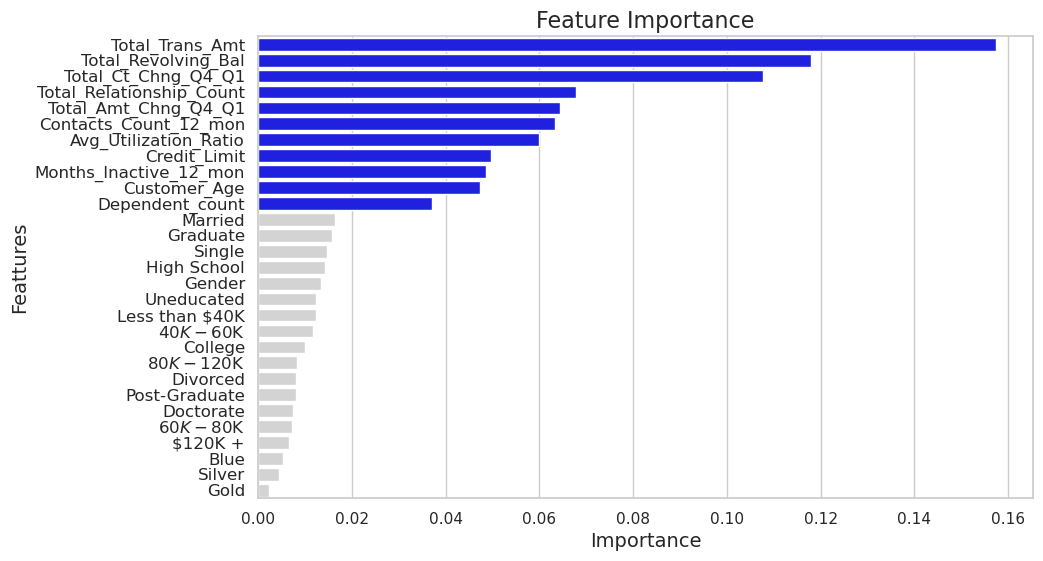

In [39]:
#Based on the analysis of the graphs, we had predicted that:
#At first glance, the following variables seem to have a significant influence on the determination of whether customers stay or not: Customer_Age, Credit_Limit,
#Total_Recovering_Bal, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio
#It seems that our intuition was correct.


#Con el análisis de las gráficas habíamos predicho que :
#A simple vista parecen tener gran peso para la determinación de la permanencia o no las siguientes variables; Customer_Age,Credit_Limit,
#Total_Recovering_Bal, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
#Al parecer nuestra intuición fue correcta

import matplotlib.pyplot as plt
import seaborn as sns

#Get the indices of all columns in descending order of importance
# Obtener los índices de todas las columnas en orden descendente de importancia
sorted_indices = feature_importances.argsort()[::-1]

#Get the names of all columns in the same order
# Obtener los nombres de todas las columnas en el mismo orden
sorted_columns = X.columns[sorted_indices]

#Get the sorted importances
# Obtener las importancias ordenadas
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))

#Create a bar chart to display the importance of all columns in descending order
# Crear un gráfico de barras para mostrar la importancia de todas las columnas en orden descendente
sns.barplot(x=sorted_importances, y=sorted_columns, palette=['lightgrey' if i not in selected_feature_indices else 'blue' for i in sorted_indices])

plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feattures", fontsize=14)
plt.title("Feature Importance", fontsize=16)
plt.yticks(rotation=0, fontsize=12)
plt.show()


In [40]:
X_new.shape

(10127, 11)

In [41]:
#As we can see, now we only have 11 significant columns to carry out the training.
#Como podemos ver ahora solo tenemos 11 columnas significativas para llevar a cabo el entrenamiento 

In [42]:
#Model Training
#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

#stratify=y: It is used to ensure that the distribution of classes in the training and test sets is similar to the original distribution 
#of the target variable y. This is particularly useful when dealing with umbalanced classes, as it ensures that both parts of the split have
#a similar proportion of each class.

#stratify=y: Se utiliza para garantizar
#que la distribución de las clases en el conjunto de entrenamiento y prueba sea similar a la distribución original de la variable objetivo y.
#Esto es especialmente útil cuando tienes clases desequilibradas, ya que asegura que ambas partes de la división tengan una proporción similar
#de cada clase.



In [43]:
#Verifying the size of the training and testing sets
#verificamos el tamaño de los set de entrenamiento y testeo
print("Training X size: ", X_train.shape)
print("Training y size: ", y_train.shape)
print("Test X size: ", X_test.shape)
print("Test y size: ", y_test.shape)

Training X size:  (7595, 11)
Training y size:  (7595,)
Test X size:  (2532, 11)
Test y size:  (2532,)


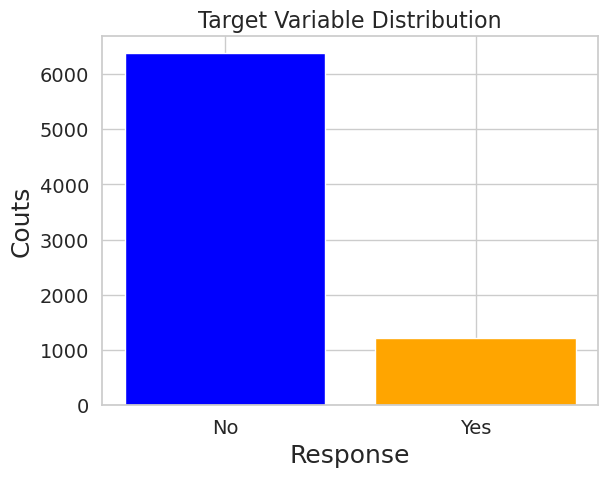

In [44]:
import matplotlib.pyplot as plt

plt.bar(['No', 'Yes'], y_train.value_counts(), color=['blue', 'orange'])
plt.xlabel('Response', fontsize=18)
plt.ylabel('Couts', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Target Variable Distribution', fontsize=16)

plt.show()


In [45]:
#SMOTE(Synthetic Minority Oversampling Technique)
#SMOTE is a technique for oversampling the minority class. Simply adding duplicate records of the minority class often does not add new
#information to the model. In SMOTE, new instances are generated from the existing data. To put it simply, SMOTE examines instances of 
#the minority class and uses the k-nearest neighbors method to select a randomly close neighbor, and a new synthetic instance is created 
#in the feature space.

#Class imbalance, where one or more classes are significantly less frequent than others, is a common challenge in machine learning.
#The presence of minority classes can cause the model to be biased towards the majority classes and have difficulty learning patterns from 
#the minority classes. This is where techniques like SMOTE (Synthetic Minority Oversampling Technique) can help by generating synthetic
#instances to balance the classes and improve the model's performance in predicting minority classes.


#SMOTE (Técnica de Sobremuestreo Sintético de la Clase Minoritaria) es una técnica para sobremuestrear la clase minoritaria. 
#Simplemente agregar registros duplicados de la clase minoritaria a menudo no agrega información nueva al modelo.
#En SMOTE, se generan nuevas instancias a partir de los datos existentes. Si lo explicamos en palabras sencillas,
#SMOTE examina las instancias de la clase minoritaria y utiliza el método de los k vecinos más cercanos para seleccionar
#un vecino cercano al azar, y se crea una nueva instancia sintética aleatoria en el espacio de características.

#El desequilibrio de clases, donde una o más clases son significativamente menos frecuentes que otras,
#es un desafío común en el aprendizaje automático. La presencia de clases minoritarias puede hacer que el
#modelo sea sesgado hacia las clases mayoritarias y que tenga dificultades para aprender patrones de las clases minoritarias.
#Es aquí donde técnicas como SMOTE (Técnica de Sobremuestreo Sintético de la Clase Minoritaria) pueden ayudar al generar instancias
#sintéticas para equilibrar las clases y mejorar el rendimiento del modelo en la predicción de clases minoritarias.


from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)


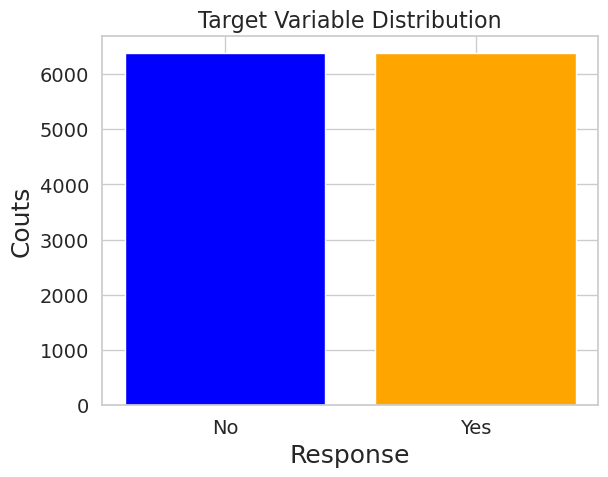

In [46]:
import matplotlib.pyplot as plt

plt.bar(['No', 'Yes'], y_train.value_counts(), color=['blue', 'orange'])
plt.xlabel('Response', fontsize=18)
plt.ylabel('Couts', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Target Variable Distribution', fontsize=16)

plt.show()


In [47]:
#Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [48]:
model_comparison={}

In [49]:
#Training with different models
#entrenamiento con distintos modelos
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#Create a list of tuples with the model name and the classifier instance
# Crear una lista de tuplas con el nombre del modelo y la instancia del clasificador
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
    ('Xg Boost', XGBClassifier())
]

model_comparison = {}  #Dictionary to store the comparison metrics of models
                        # Diccionario para almacenar las métricas de comparación de modelos

for model_name, classifier in models:
    #Fit the model using the training set
    # Ajustar el modelo usando el conjunto de entrenamiento
    classifier.fit(X_train, y_train)
    #Make predictions on the test set
    # Realizar predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test)
    #Calculate model metrics
    # Calcular métricas del modelo
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='weighted')
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring="recall")
    cv_accuracy = accuracies.mean()
    cv_std = accuracies.std()
    accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
    accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])
    #Print model metrics
    # Imprimir métricas del modelo
    print(f"Modelo: {model_name}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Model F1-Score: {f1 * 100:.2f}%")
    print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")
    #Add metrics to the models comparison dictionary
    # Agregar métricas al diccionario de comparación de modelos
    model_comparison[model_name] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
    print(classification_report(y_pred, y_test, zero_division=1))
    print("-" * 60)


Modelo: Logistic Regression
Model Accuracy: 78.99%
Model F1-Score: 77.00%
Cross Val Accuracy: 78.45%
Cross Val Standard Deviation: 1.05%
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1835
           1       0.70      0.41      0.52       697

    accuracy                           0.79      2532
   macro avg       0.75      0.67      0.69      2532
weighted avg       0.78      0.79      0.77      2532

------------------------------------------------------------
Modelo: Decision Tree
Model Accuracy: 93.25%
Model F1-Score: 93.20%
Cross Val Accuracy: 93.63%
Cross Val Standard Deviation: 6.39%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2110
           1       0.81      0.78      0.79       422

    accuracy                           0.93      2532
   macro avg       0.88      0.87      0.88      2532
weighted avg       0.93      0.93      0.93      2532

-----------------

In [50]:
#Ensemble methods in machine learning involve combining multiple models (often weaker models or base models) to create a stronger,
#more robust predictive model. The idea behind ensembling is that by combining the predictions of multiple models, the strengths 
#of each individual model can compensate for the weaknesses of others, leading to improved overall performance.
from sklearn.ensemble import VotingClassifier

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
    ('Xg Boost', XGBClassifier())
]

voting_classifier = VotingClassifier(estimators=models, voting='soft')  # Puedes usar 'hard' o 'soft' para el voto

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='weighted')
accuracies = cross_val_score(estimator=voting_classifier, X=X_train, y=y_train, cv=5, scoring="recall")
cv_accuracy = accuracies.mean()
cv_std = accuracies.std()
accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])

print("Modelo: Voting Classifier")
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model F1-Score: {f1 * 100:.2f}%")
print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")

model_comparison['Voting Classifier'] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
print(classification_report(y_pred, y_test, zero_division=1))
print("-" * 60)


Modelo: Voting Classifier
Model Accuracy: 95.02%
Model F1-Score: 95.01%
Cross Val Accuracy: 96.38%
Cross Val Standard Deviation: 5.96%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2121
           1       0.85      0.84      0.85       411

    accuracy                           0.95      2532
   macro avg       0.91      0.91      0.91      2532
weighted avg       0.95      0.95      0.95      2532

------------------------------------------------------------


In [51]:
#Models Comparisson
# Comparación de modelos
for model_name, metrics in model_comparison.items():
    print(f"Modelo: {model_name}")
    print(f"Model Accuracy: {metrics[0] * 100:.2f}%")
    print(f"Model F1-Score: {metrics[3] * 100:.2f}%")
    print(f"Cross Val Accuracy: {metrics[4] * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {metrics[5] * 100:.2f}%")
    print("-" * 60)

#Compare the performance of the Voting Classifier with the individual models    
# Comparar el rendimiento del Voting Classifier con los modelos individuales
voting_metrics = model_comparison['Voting Classifier']
for model_name in model_comparison:
    if model_name != 'Voting Classifier':
        individual_metrics = model_comparison[model_name]
        print(f"Comparando con {model_name}:")
        print(f"Mejora en Accuracy: {voting_metrics[0] - individual_metrics[0]:.2f}")
        print(f"Mejora en F1-Score: {voting_metrics[3] - individual_metrics[3]:.2f}")
        print("-" * 40)

Modelo: Logistic Regression
Model Accuracy: 78.99%
Model F1-Score: 77.00%
Cross Val Accuracy: 78.45%
Cross Val Standard Deviation: 1.05%
------------------------------------------------------------
Modelo: Decision Tree
Model Accuracy: 93.25%
Model F1-Score: 93.20%
Cross Val Accuracy: 93.63%
Cross Val Standard Deviation: 6.39%
------------------------------------------------------------
Modelo: KNN
Model Accuracy: 84.87%
Model F1-Score: 83.67%
Cross Val Accuracy: 97.19%
Cross Val Standard Deviation: 0.40%
------------------------------------------------------------
Modelo: Naive Bayes
Model Accuracy: 75.91%
Model F1-Score: 73.36%
Cross Val Accuracy: 77.68%
Cross Val Standard Deviation: 2.85%
------------------------------------------------------------
Modelo: Random Forest
Model Accuracy: 94.71%
Model F1-Score: 94.81%
Cross Val Accuracy: 94.45%
Cross Val Standard Deviation: 7.93%
------------------------------------------------------------
Modelo: Xg Boost
Model Accuracy: 96.29%
Model 

In [52]:
#MODEL COMPARISSON
#COMPARACIÓN DE MODELOS

Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model Accuracy-0','Model Accuracy-1','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='magma')

In [53]:
import pandas as pd

Model_com_df = pd.DataFrame(model_comparison).T
Model_com_df.columns = ['Model Accuracy', 'Model Accuracy-No', 'Model Accuracy-Yes', 'Model F1-Score', 'CV Accuracy', 'CV std']
Model_com_df = Model_com_df.sort_values(by='Model F1-Score', ascending=False)

def highlight_below_75(s):
    if s.name != 'CV std' and isinstance(s, pd.Series) and s.dtype == 'float64':
        return ['color: red' if value < 0.75 else 'color: black' for value in s]
    else:
        return ['color: black'] * len(s)

styled_df = Model_com_df.style.highlight_max(axis=0).apply(highlight_below_75, subset=pd.IndexSlice[:, :'CV Accuracy']).format("{:.2%}", subset=pd.IndexSlice[:, :'CV Accuracy'])
styled_df


In [54]:
#As we can see, the XGBoost algorithm has the best values for Model Accuracy and F1-Score, making it a viable option to implement the model.
#However, the Voting Classifier has parameters very similar to XGBoost but with significantly better CV Accuracy, making it a more robust model.
#Ensemble methods in machine learning involve combining multiple models (often weaker models or base models) to create a stronger,
#more robust predictive model. The idea behind ensembling is that by combining the predictions of multiple models, the strengths 
#of each individual model can compensate for the weaknesses of others, leading to improved overall performance.
from sklearn.ensemble import VotingClassifier

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
    ('Xg Boost', XGBClassifier())
]

voting_classifier = VotingClassifier(estimators=models, voting='soft')  # Puedes usar 'hard' o 'soft' para el voto

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='weighted')
accuracies = cross_val_score(estimator=voting_classifier, X=X_train, y=y_train, cv=5, scoring="recall")
cv_accuracy = accuracies.mean()
cv_std = accuracies.std()
accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])

print("Modelo: Voting Classifier")
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model F1-Score: {f1 * 100:.2f}%")
print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")

model_comparison['Voting Classifier'] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
print(classification_report(y_pred, y_test, zero_division=1))
print("-" * 60)


Modelo: Voting Classifier
Model Accuracy: 95.02%
Model F1-Score: 95.01%
Cross Val Accuracy: 96.38%
Cross Val Standard Deviation: 5.96%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2121
           1       0.85      0.84      0.85       411

    accuracy                           0.95      2532
   macro avg       0.91      0.91      0.91      2532
weighted avg       0.95      0.95      0.95      2532

------------------------------------------------------------


[[2060   65]
 [  61  346]]
Normalized confusion matrix
[[0.97 0.03]
 [0.15 0.85]]


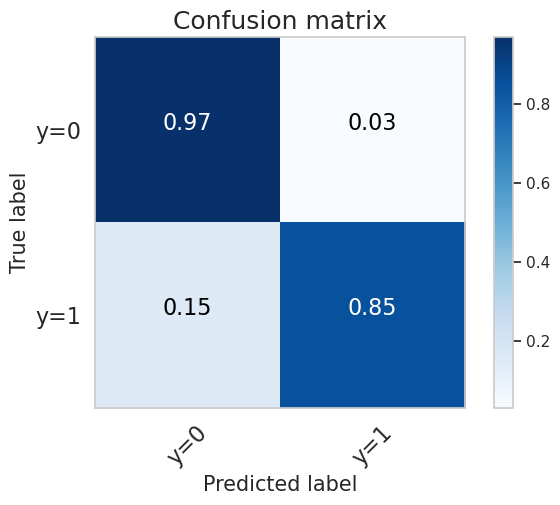

In [55]:
# Compute confusion matrix for the best model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    #Plot the confusion matrix.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(False)
    plt.title(title,fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Add labels to the cells of the confusion matrix.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=16,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

print(confusion_matrix(y_test, y_pred, labels=[0,1]))


cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y=0','y=1'],normalize= True,  title='Confusion matrix')

In [56]:
#DEEP LEARNING
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Scale the data with StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict on the test data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calculate metrics
print(f"Model Accuracy: {accuracy_score(y_pred, y_test) * 100:.2f}%")
print(f"Model F1-Score: {f1_score(y_pred, y_test, average='weighted') * 100:.2f}%")
print(classification_report(y_pred, y_test, zero_division=1))

# Calculate accuracies per class
accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/10
399/399 [==============================] - 2s 2ms/step - loss: 0.3933 - accuracy: 0.8229
Epoch 2/10
399/399 [==============================] - 1s 2ms/step - loss: 0.2969 - accuracy: 0.8735
Epoch 3/10
399/399 [==============================] - 1s 2ms/step - loss: 0.2519 - accuracy: 0.8980
Epoch 4/10
399/399 [==============================] - 1s 2ms/step - loss: 0.2221 - accuracy: 0.9111
Epoch 5/10
399/399 [==============================] - 1s 2ms/step - loss: 0.2030 - accuracy: 0.9239
Epoch 6/10
399/399 [==============================] - 1s 2ms/step - loss: 0.1873 - accuracy: 0.9281
Epoch 7/10
399/399 [==============================] - 1s 2ms/step - loss: 0.1734 - accuracy: 0.9355
Epoch 8/10
399/399 [==============================] - 1s 2ms/step - loss: 0.1612 - accuracy: 0.9424
Epoch 9/10
399/399 [==============================] - 1s 2ms/step - loss: 0.1501 - accuracy: 0.9461
Epoch 10/10
80/80 [==============================] - 0s 1ms/step
Model Accuracy: 92.30%
Model F1-Sco

[[1993  132]
 [  63  344]]
Normalized confusion matrix
[[0.94 0.06]
 [0.15 0.85]]


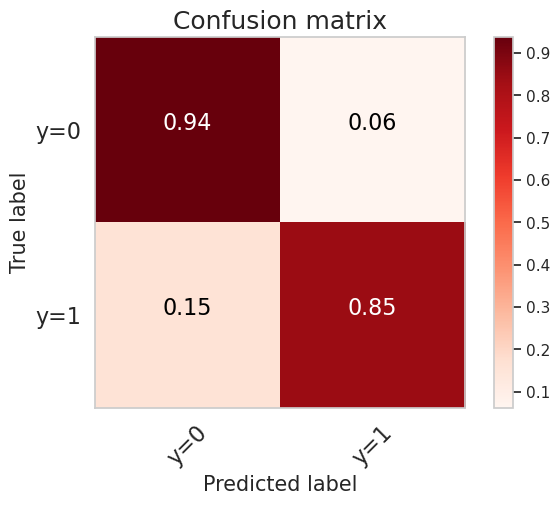

In [57]:
# Compute confusion matrix for the Deep learning model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    #Plot the confusion matrix.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(False)  # <-- Agregar esta línea para evitar el aviso de deprecación
    plt.title(title,fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Add labels to the cells of the confusion matrix.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=16,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

print(confusion_matrix(y_test, y_pred, labels=[0,1]))


cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y=0','y=1'],normalize= True,  title='Confusion matrix')